In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [57]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [59]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,1969
cast,570
country,476
date_added,11
release_year,0
rating,10
duration,0


In [60]:
# Fill null values in director, cast, and country columns with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Fill null values in date_added and rating columns with the mode
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Verify that there are no more null values
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [61]:
df.duplicated().sum()

np.int64(0)

# Task
Analyze the Netflix dataset "netflix_titles.csv" by performing 10 time-based questions with plotting.

In [62]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      6234 non-null   object        
 4   cast          6234 non-null   object        
 5   country       6234 non-null   object        
 6   date_added    6234 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6234 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  description   6234 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 584.6+ KB


## Extract year and month

In [63]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,9


## Analyze content added over time


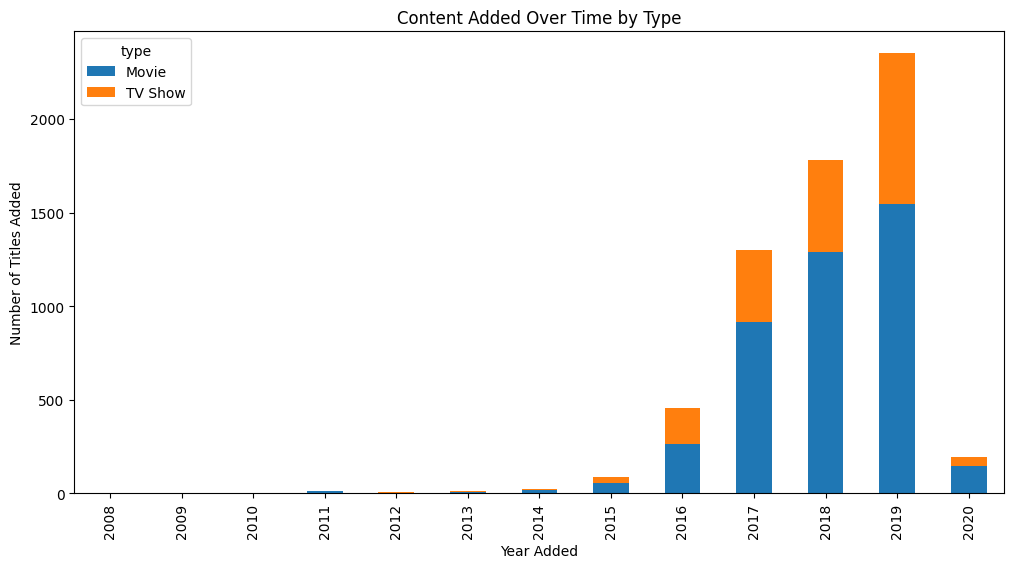

In [64]:
content_by_year_type = df.groupby(['year_added', 'type']).size().unstack()

plt.figure(figsize=(12, 6))
content_by_year_type.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Content Added Over Time by Type')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.show()

## Analyze content added by month


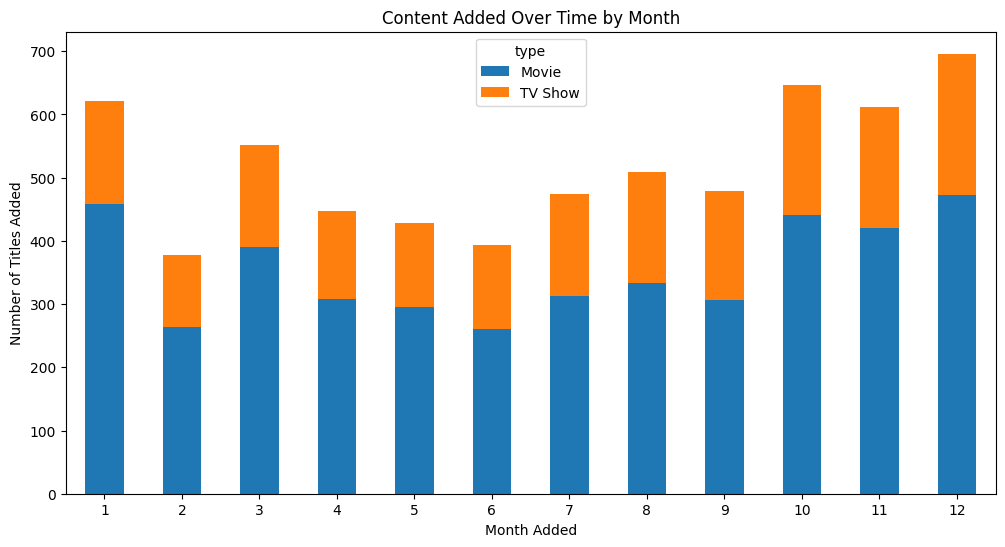

In [65]:
content_by_month_type = df.groupby(['month_added', 'type']).size().unstack()

plt.figure(figsize=(12, 6))
content_by_month_type.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Content Added Over Time by Month')
plt.xlabel('Month Added')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=0)
plt.show()

## Analyze content added by month and year

In [66]:
content_by_year_month_type = df.groupby(['year_added', 'month_added', 'type']).size().unstack()
display(content_by_year_month_type.head())

type                    Movie  TV Show
year_added month_added                
2008       1              1.0      NaN
           2              NaN      1.0
2009       5              1.0      NaN
           11             1.0      NaN
2010       11             1.0      NaN

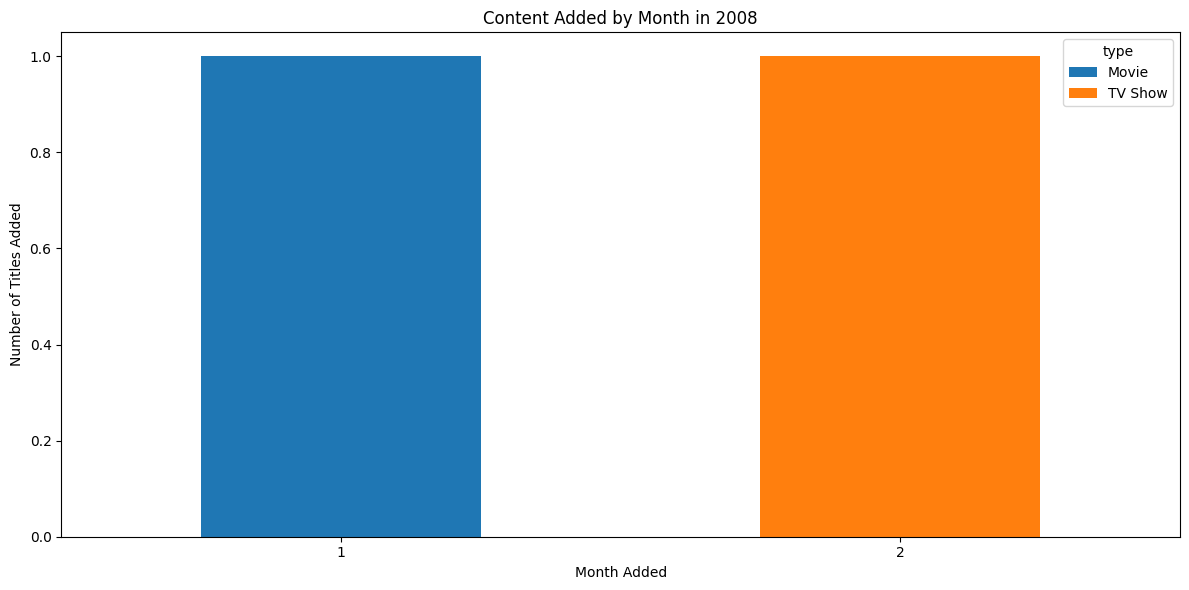

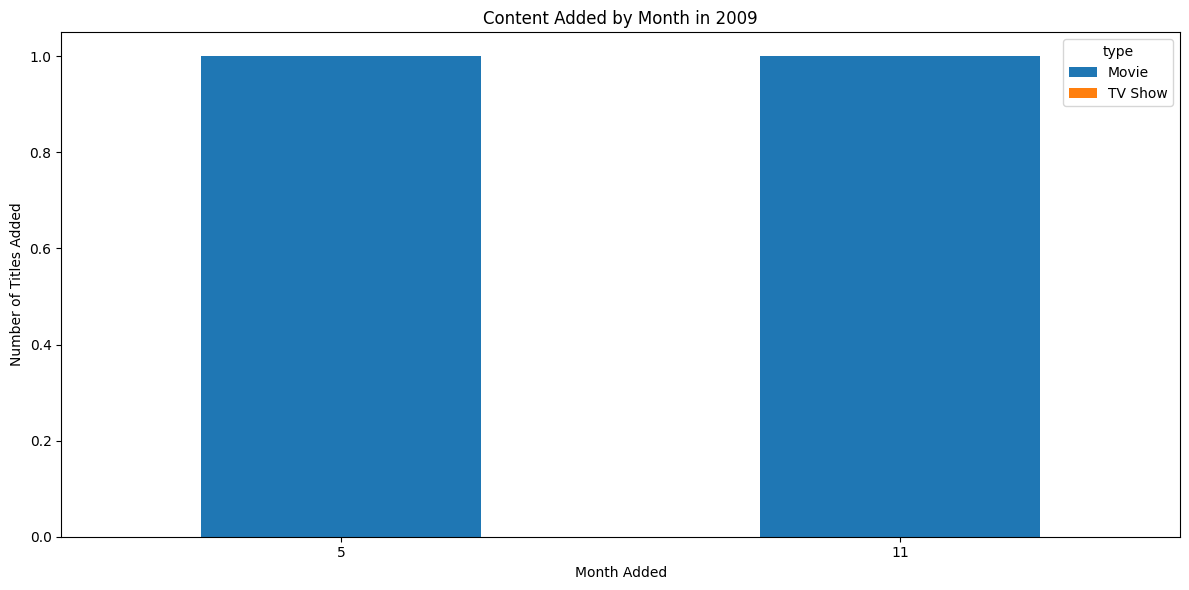

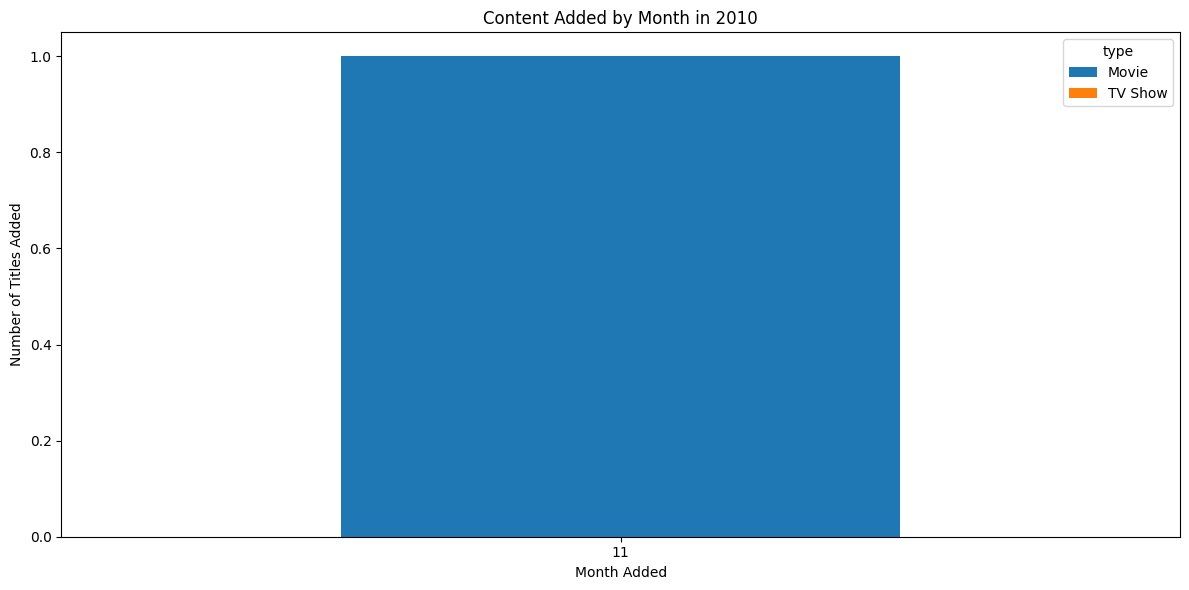

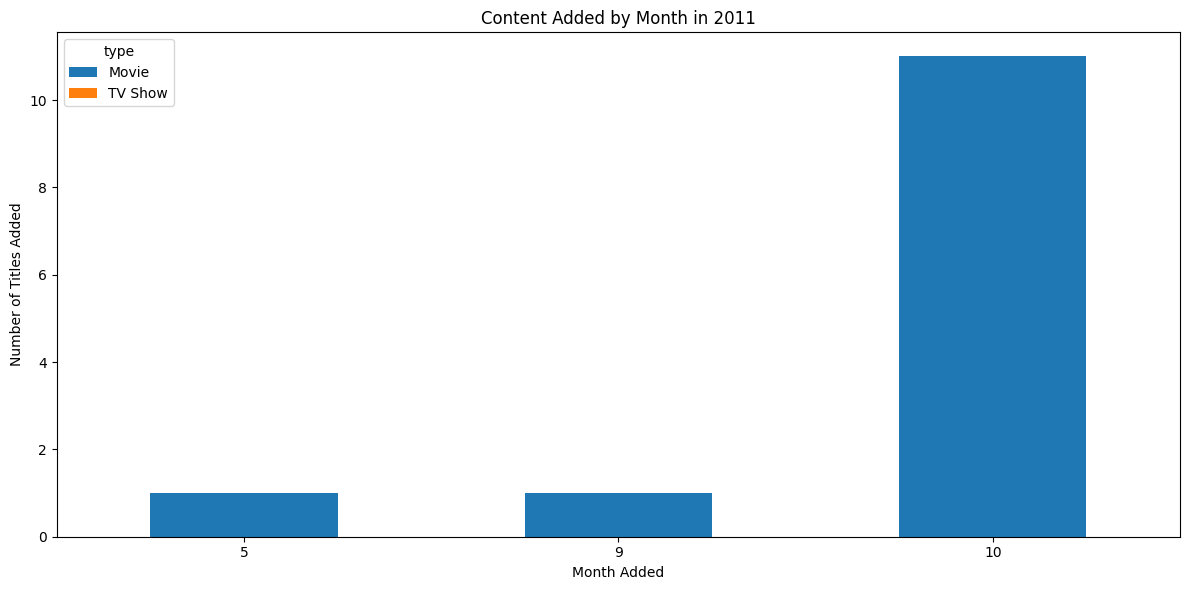

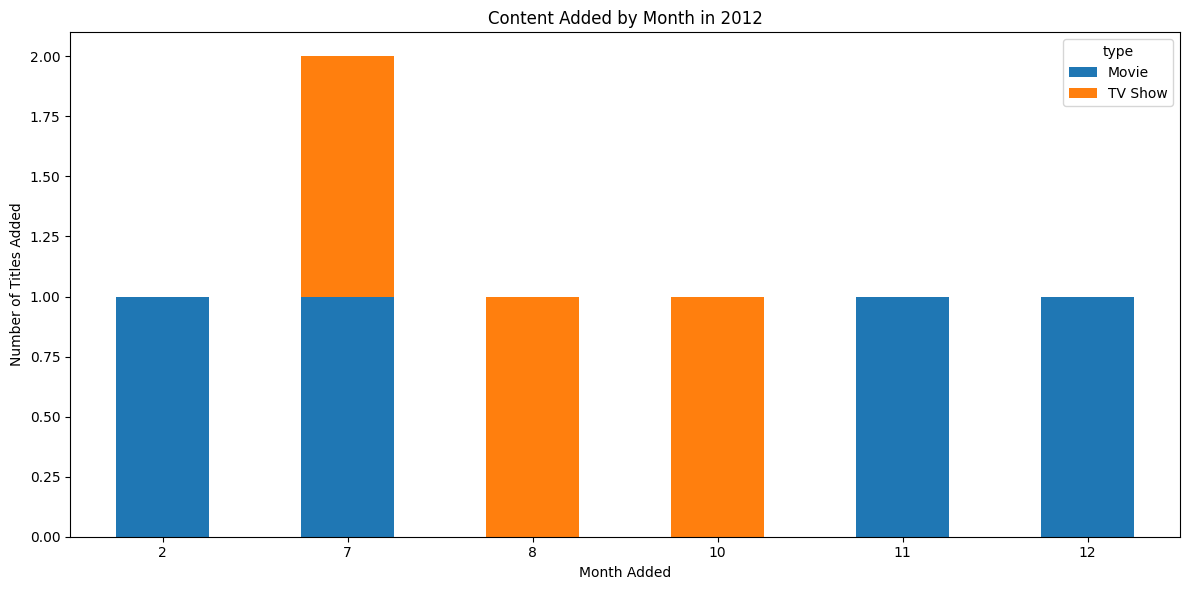

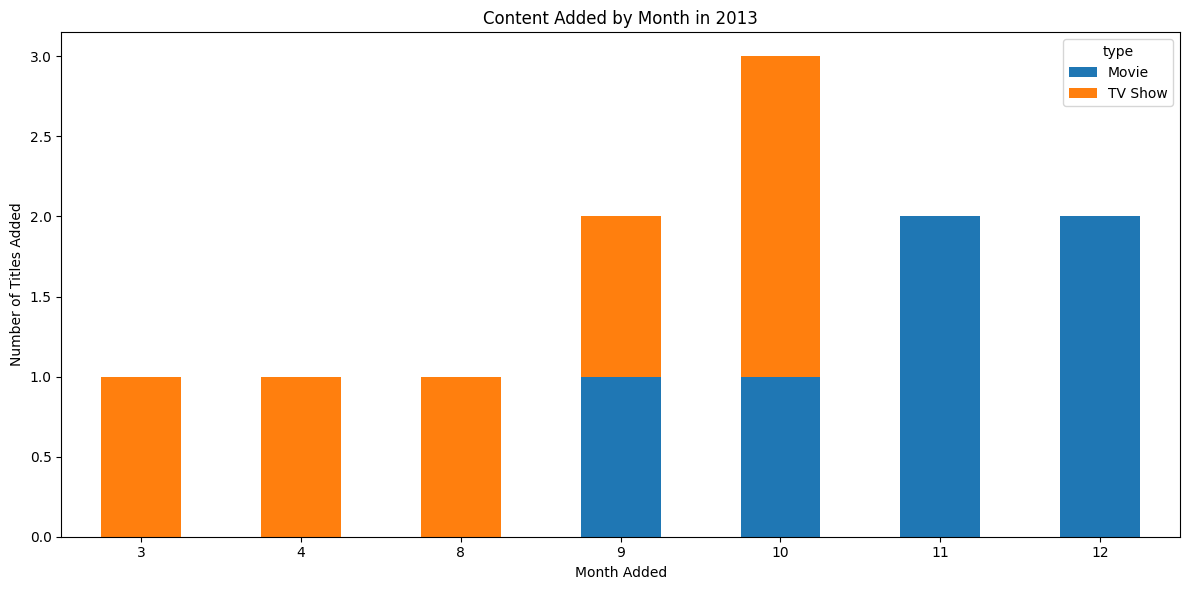

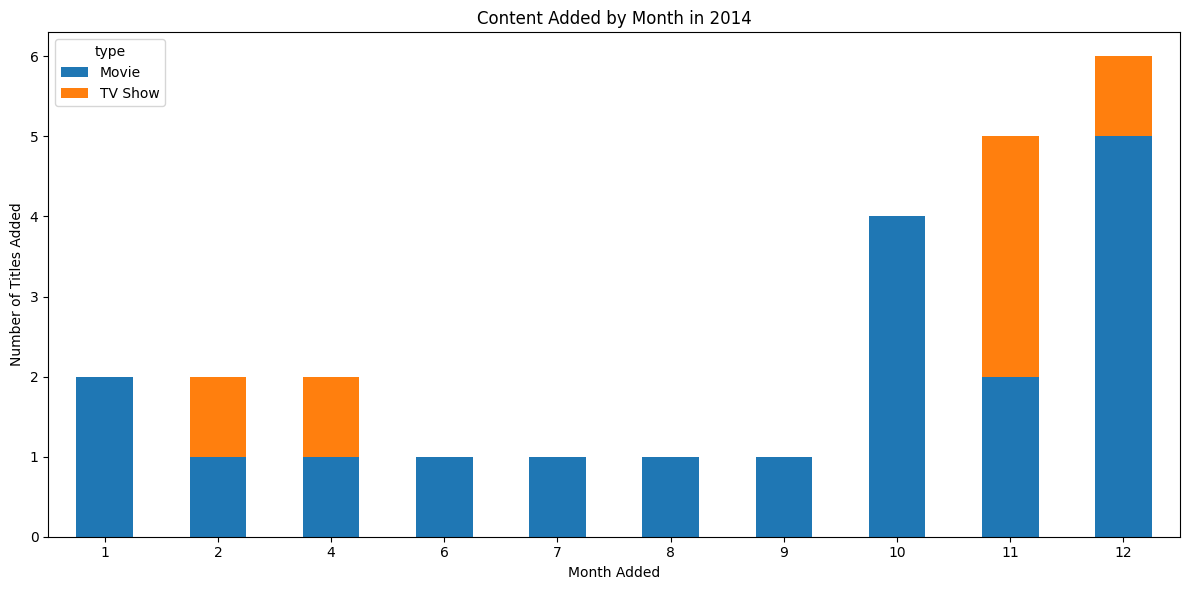

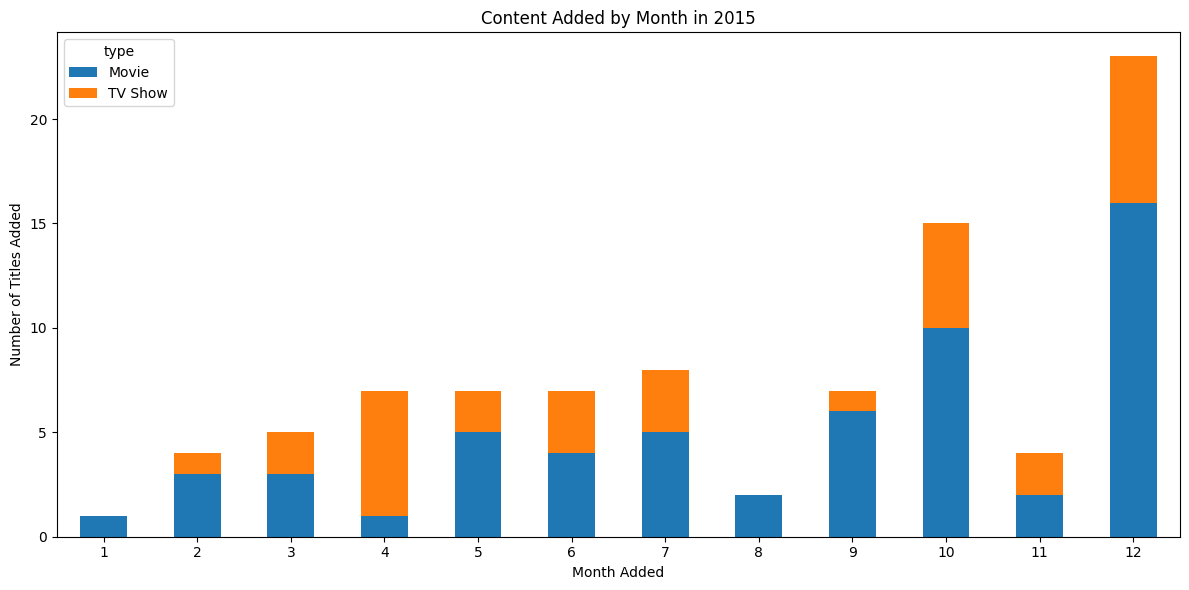

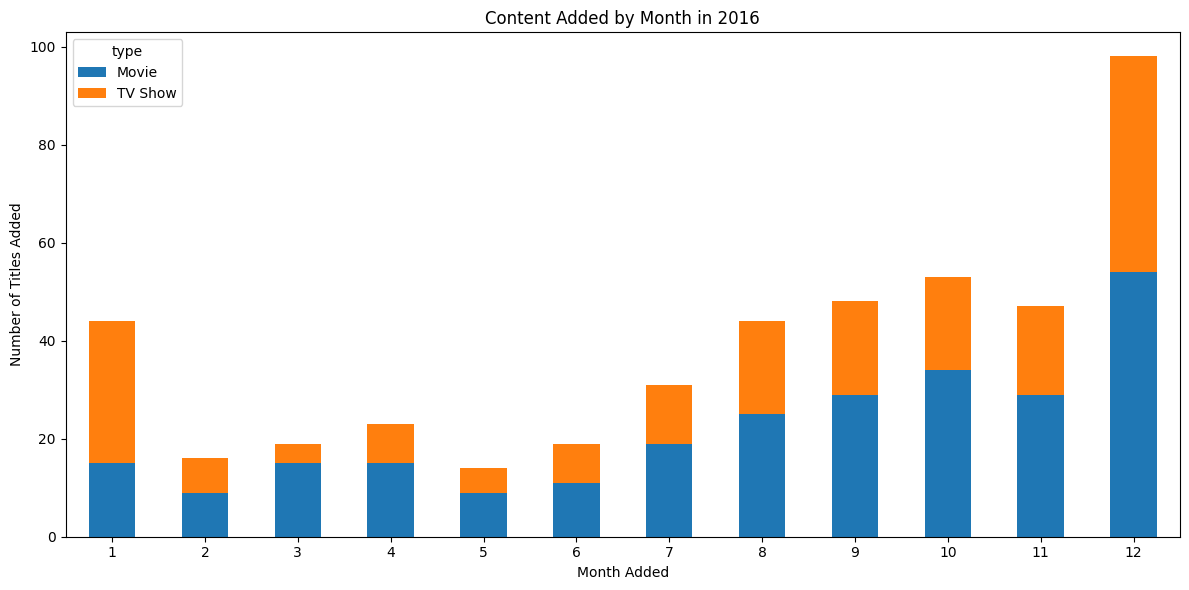

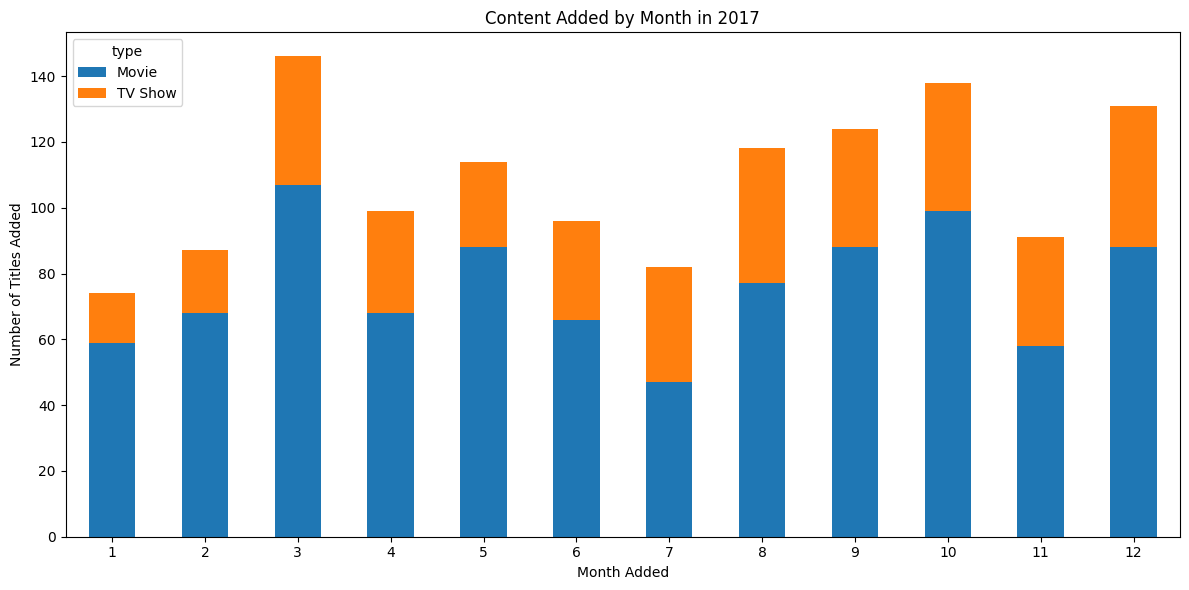

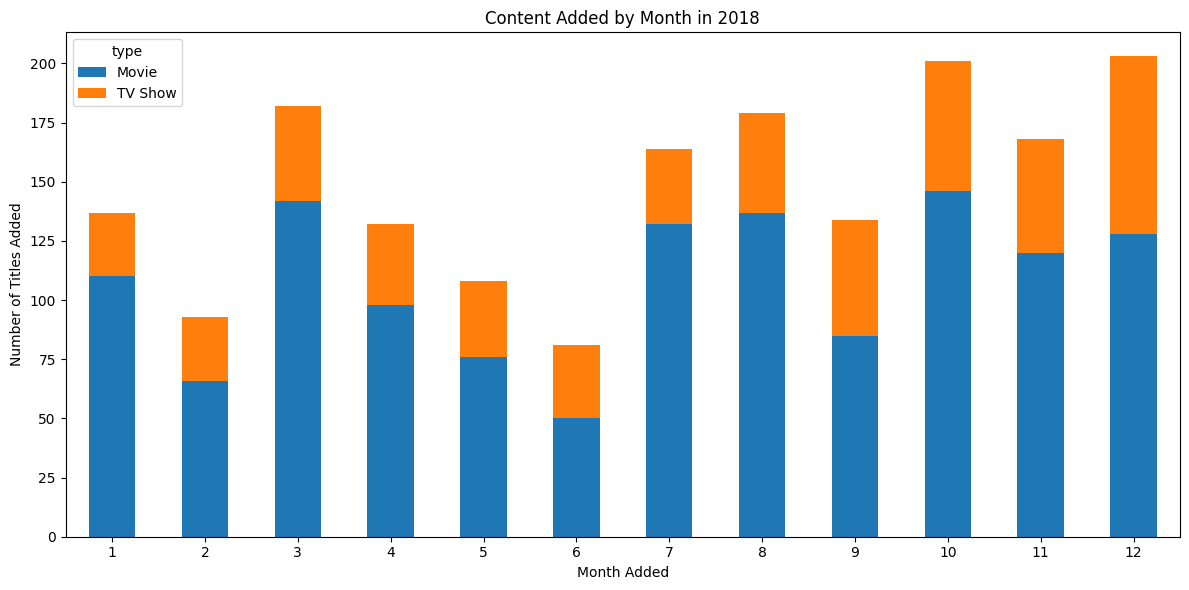

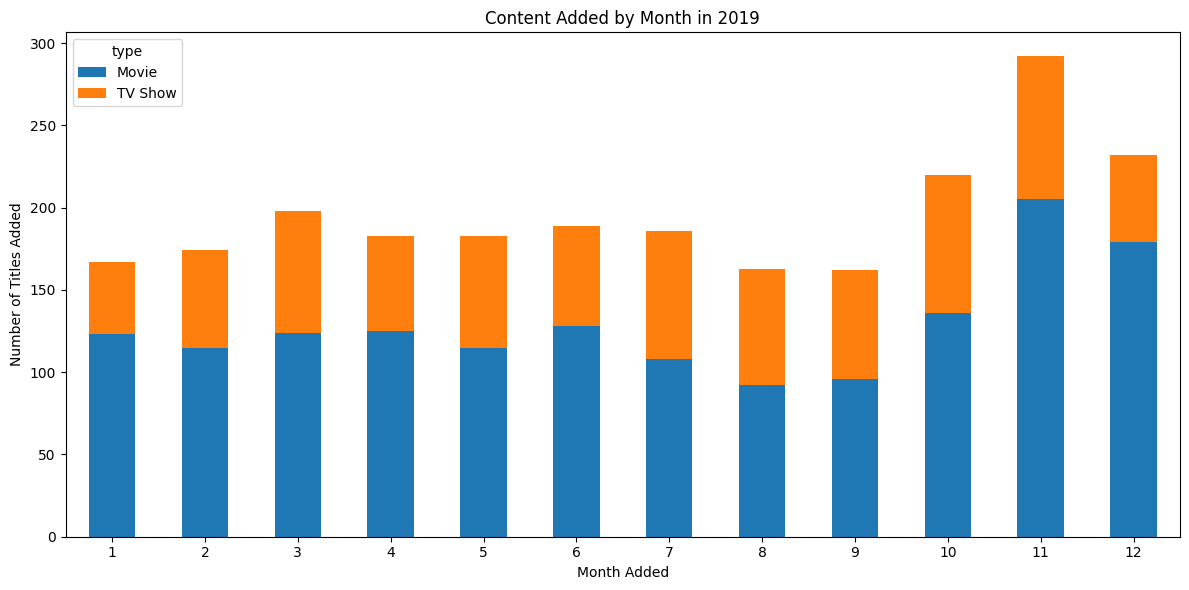

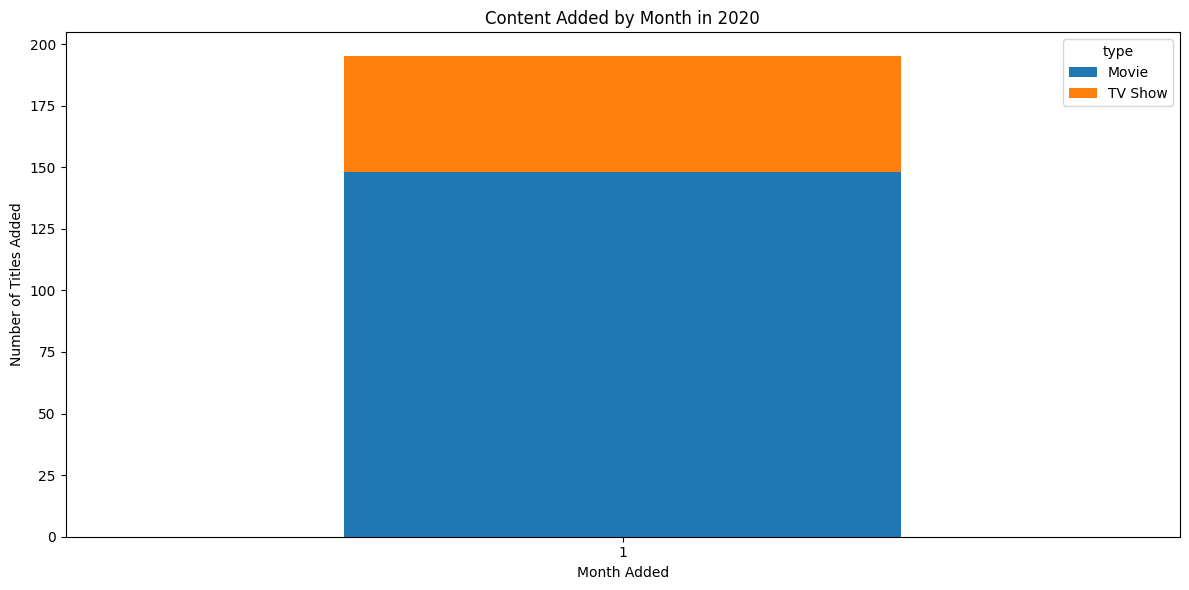

In [67]:
years = content_by_year_month_type.index.get_level_values('year_added').unique()

for year in years:
    data_to_plot = content_by_year_month_type.loc[year].fillna(0)
    fig, ax = plt.subplots(figsize=(12, 6))
    data_to_plot.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Content Added by Month in {year}')
    ax.set_xlabel('Month Added')
    ax.set_ylabel('Number of Titles Added')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Analyze the most frequent release years

### Subtask:
Plot the top 10 release years with the most content.


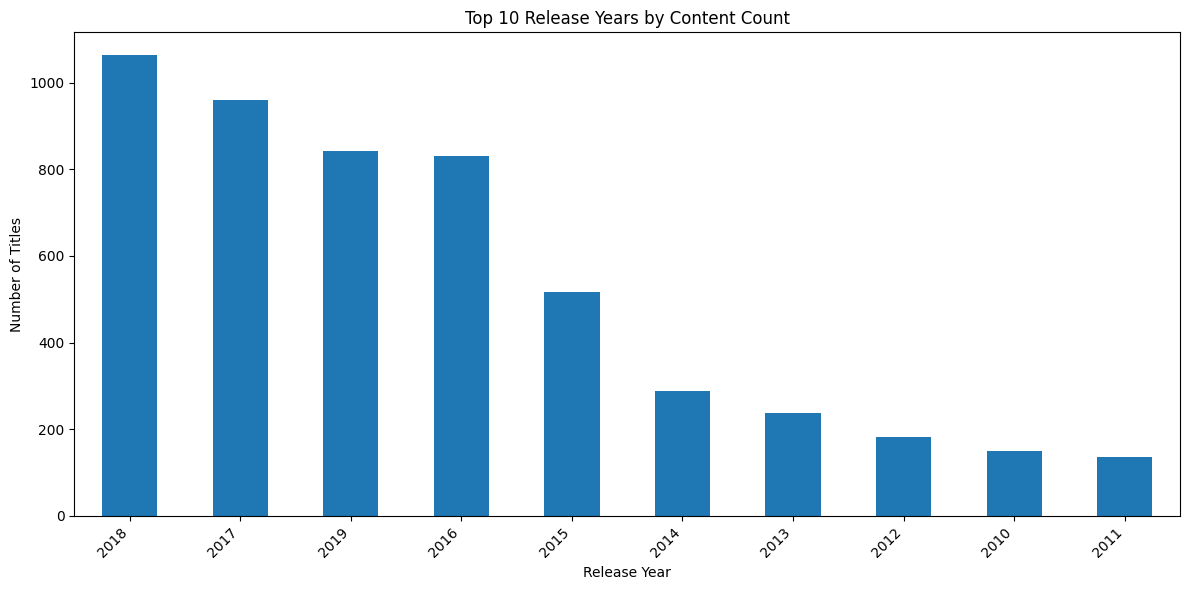

In [68]:
top_10_release_years = df['release_year'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_10_release_years.plot(kind='bar')
plt.title('Top 10 Release Years by Content Count')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze the distribution of content types over time

### Subtask:
Plot the proportion of movies and TV shows added over the years.


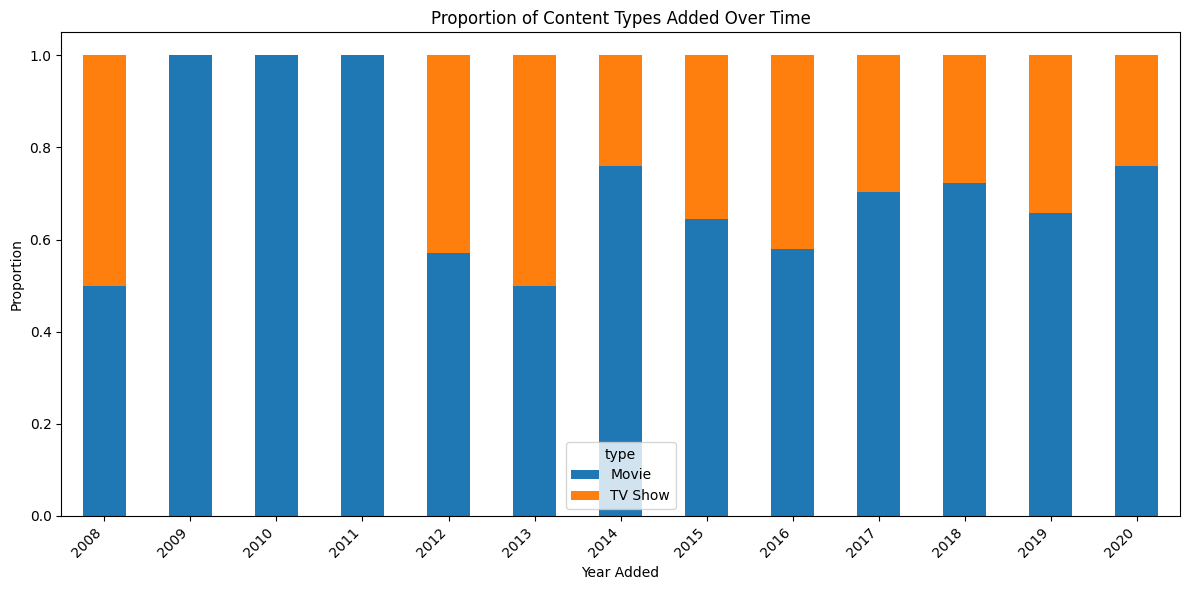

In [69]:
content_by_year_type = df.groupby(['year_added', 'type']).size().unstack()
content_proportion = content_by_year_type.divide(content_by_year_type.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(12, 6))
content_proportion.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Proportion of Content Types Added Over Time')
ax.set_xlabel('Year Added')
ax.set_ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze the average duration of movies over time

### Subtask:
Calculate and plot the average movie duration per year.


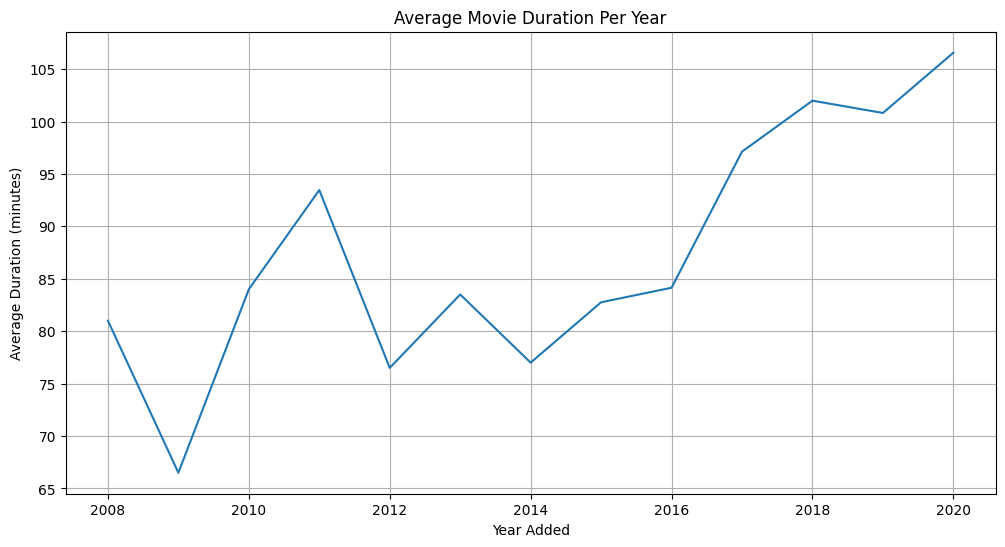

In [70]:
movies_df = df[df['type'] == 'Movie'].copy()

movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)

average_movie_duration_per_year = movies_df.groupby('year_added')['duration'].mean()

plt.figure(figsize=(12, 6))
average_movie_duration_per_year.plot(kind='line')
plt.title('Average Movie Duration Per Year')
plt.xlabel('Year Added')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()

## Analyze the most popular genres over time

### Subtask:
Identify and visualize the most popular genres added over the years.


In [71]:
content_df = df[(df['type'] == 'Movie') | (df['type'] == 'TV Show')].copy()
content_df.reset_index(drop=True, inplace=True)

content_df['listed_in'] = content_df['listed_in'].str.split(', ')
content_genres = content_df.explode('listed_in')
display(content_genres.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,Children & Family Movies,Before planning an awesome wedding for his gra...,2019,9
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,Comedies,Before planning an awesome wedding for his gra...,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9


In [72]:
genre_counts_per_year = content_genres.groupby(['year_added', 'listed_in']).size().reset_index(name='count')

top_genres_per_year = genre_counts_per_year.groupby('year_added').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
display(top_genres_per_year.head())

,year_added,listed_in,count
0,2008,Dramas,1
1,2008,Independent Movies,1
2,2008,Stand-Up Comedy & Talk Shows,1
3,2008,Thrillers,1
4,2009,Dramas,1


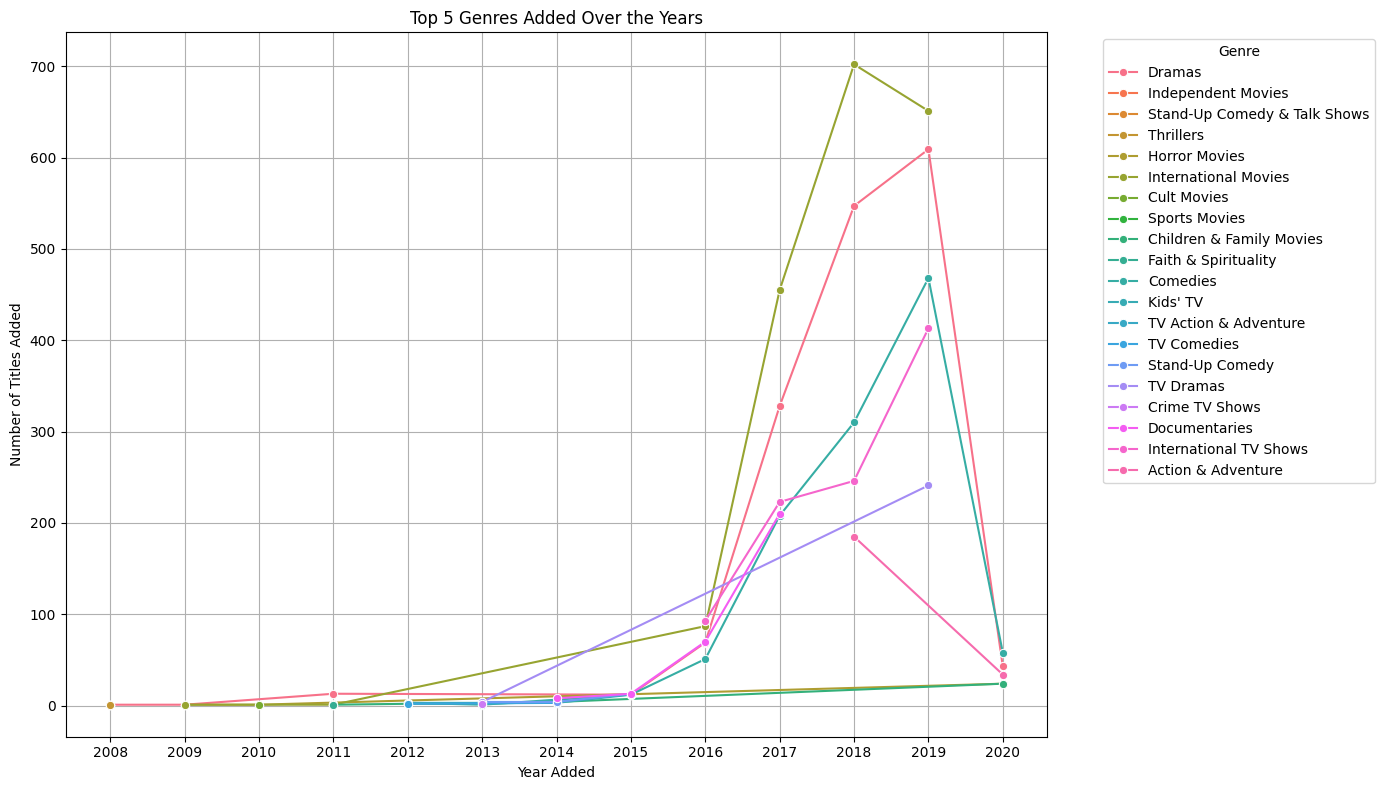

In [73]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_genres_per_year, x='year_added', y='count', hue='listed_in', marker='o')
plt.title('Top 5 Genres Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(top_genres_per_year['year_added'].unique())
plt.grid(True)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analyze the trend of ratings over time

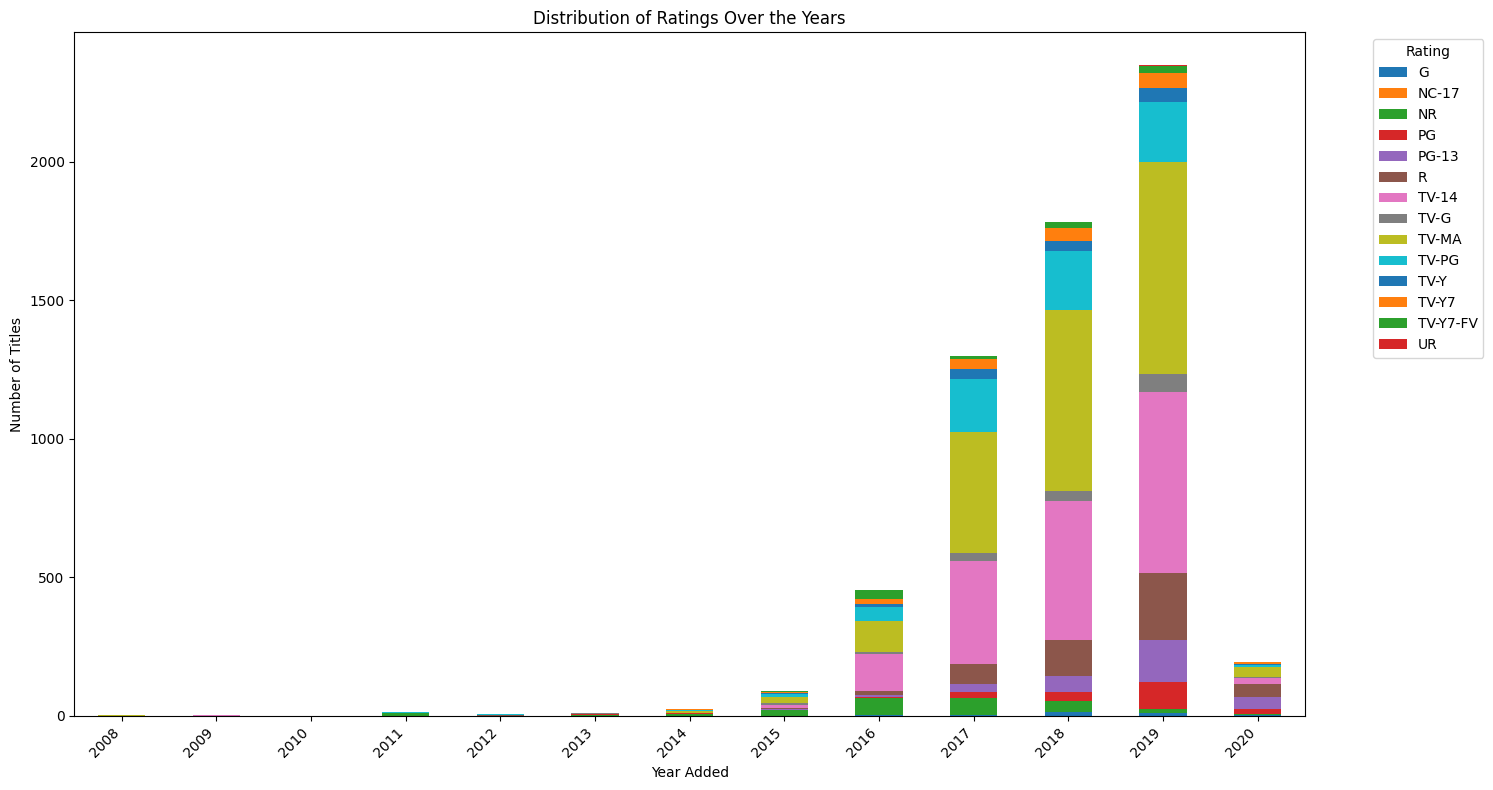

In [74]:
rating_distribution_over_years = df.groupby(['year_added', 'rating']).size().unstack().fillna(0)

plt.figure(figsize=(15, 8))
rating_distribution_over_years.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribution of Ratings Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analyze the top countries by content added over time

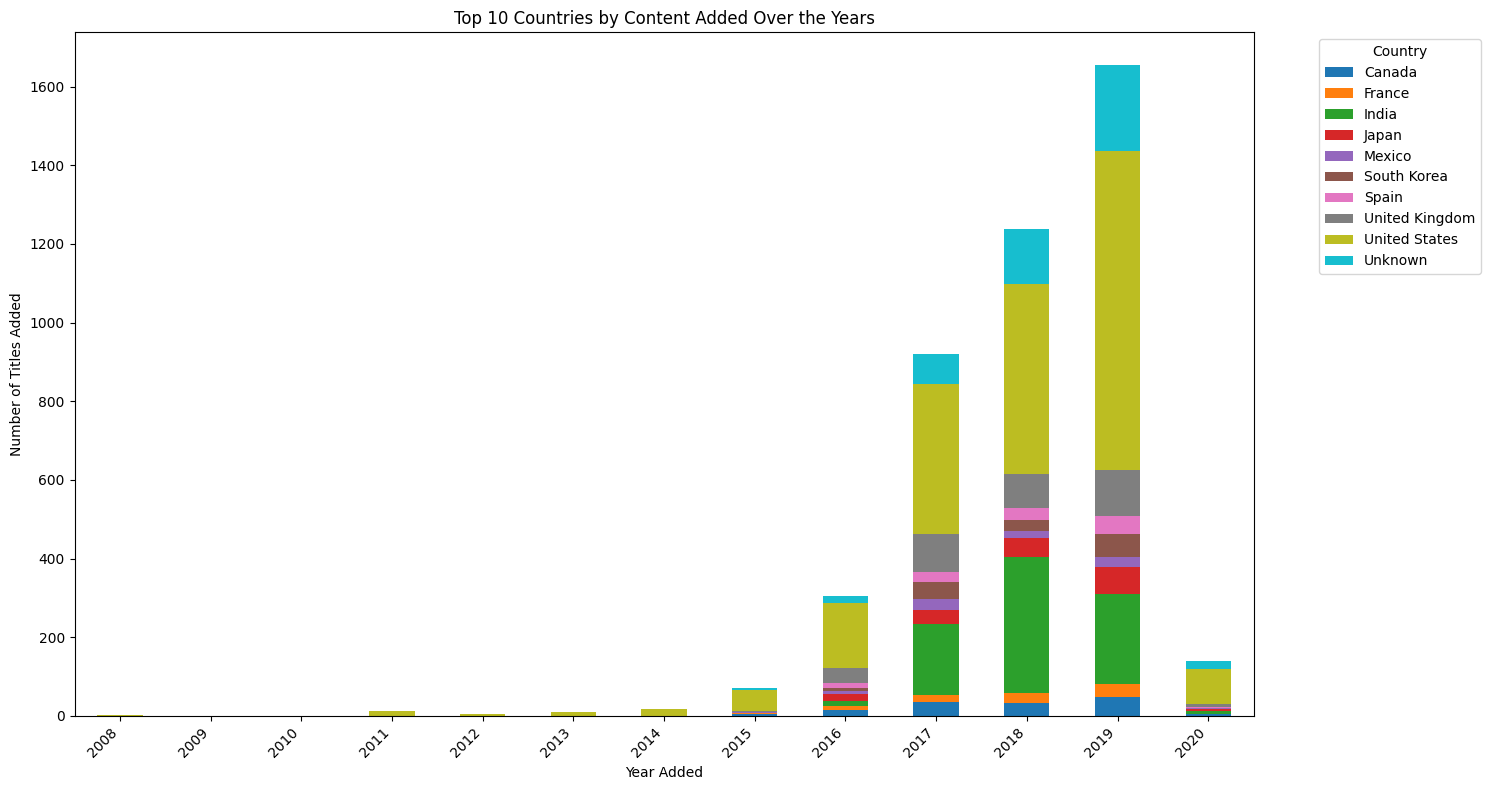

In [75]:
country_counts = df['country'].value_counts()
top_10_countries = country_counts.nlargest(10).index.tolist()

filtered_df = df[df['country'].isin(top_10_countries)]

country_year_counts = filtered_df.groupby(['year_added', 'country']).size().unstack().fillna(0)

plt.figure(figsize=(15, 8))
country_year_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Top 10 Countries by Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analyze the relationship between release year and added year

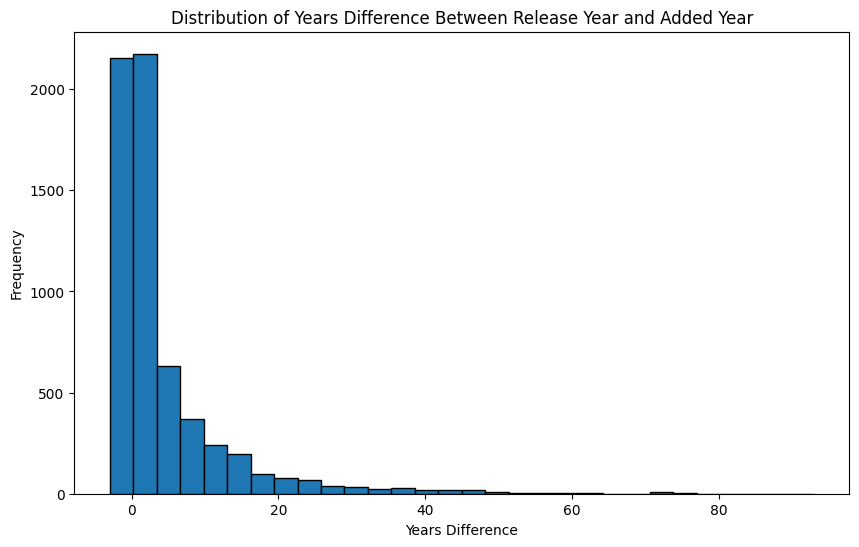

In [76]:
df['years_difference'] = df['year_added'] - df['release_year']

plt.figure(figsize=(10, 6))
plt.hist(df['years_difference'], bins=30, edgecolor='black')
plt.title('Distribution of Years Difference Between Release Year and Added Year')
plt.xlabel('Years Difference')
plt.ylabel('Frequency')
plt.show()

## Analyze the directors with most content added over time

In [77]:
directors_df = df.copy()
directors_df['director'] = directors_df['director'].str.split(', ')
content_directors = directors_df.explode('director')

director_counts_per_year = content_directors.groupby(['year_added', 'director']).size().reset_index(name='count')

top_directors_per_year = director_counts_per_year.groupby('year_added').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
display(top_directors_per_year.head())

,year_added,director,count
0,2008,Sorin Dan Mihalcescu,1
1,2008,Unknown,1
2,2009,Joe Dante,1
3,2009,Ole Bornedal,1
4,2010,Jim Monaco,1


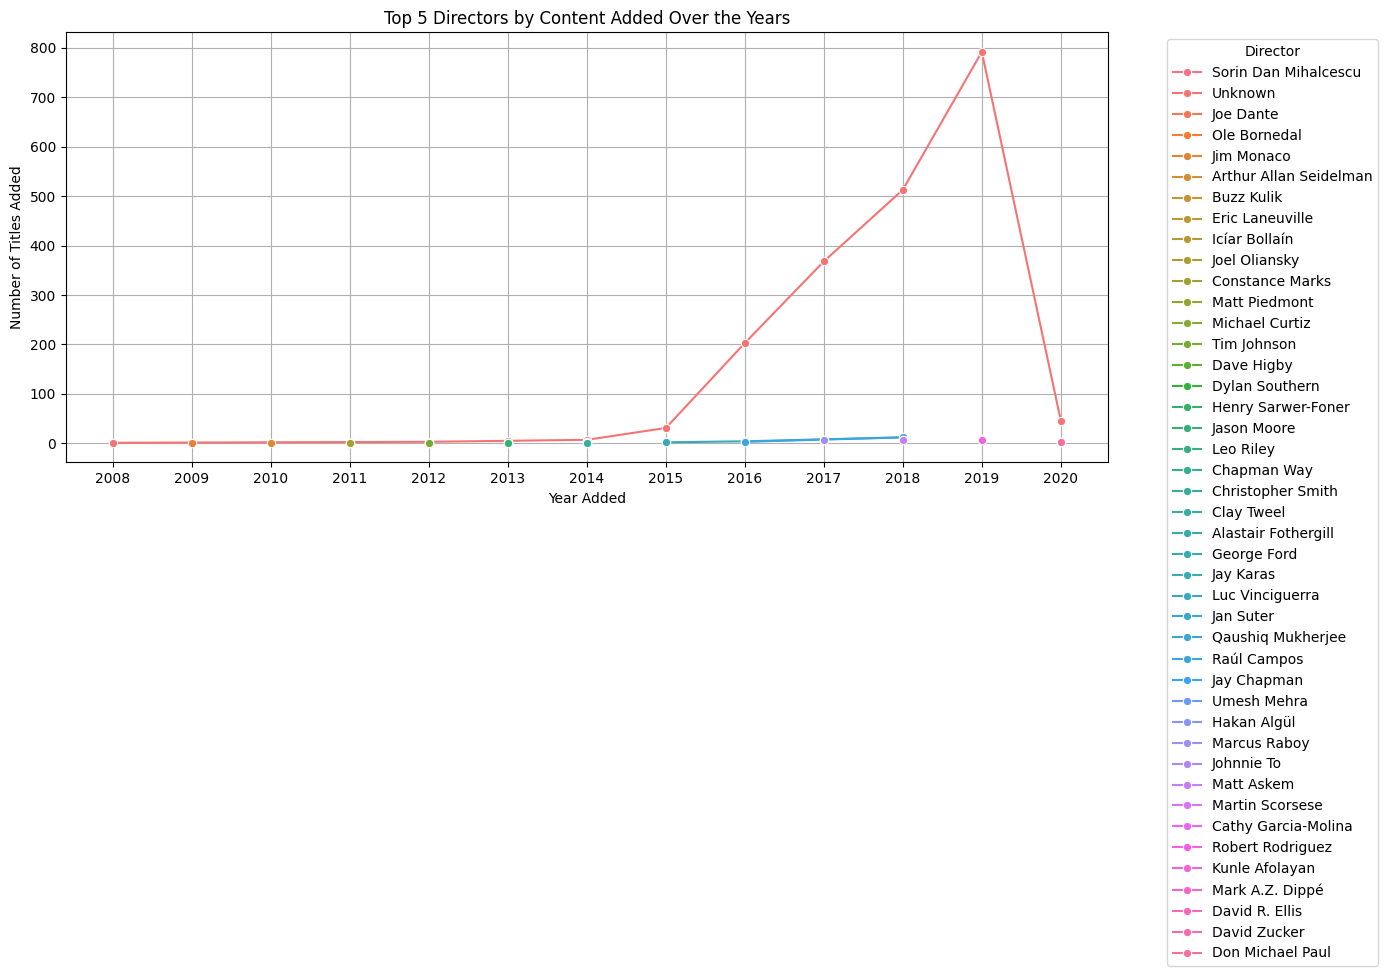

In [78]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_directors_per_year, x='year_added', y='count', hue='director', marker='o')
plt.title('Top 5 Directors by Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(top_directors_per_year['year_added'].unique())
plt.grid(True)
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analyze the cast with most content added over time

In [79]:
cast_df = df.copy()
cast_df['cast'] = cast_df['cast'].str.split(', ')
content_cast = cast_df.explode('cast')
display(content_cast.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,years_difference
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",Alan Marriott,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9,0
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",Andrew Toth,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9,0
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",Brian Dobson,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9,0
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",Cole Howard,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9,0
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",Jennifer Cameron,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9,0


# Task
Perform 20 business questions between columns and each other on the Netflix dataset.

## Analyze content by type

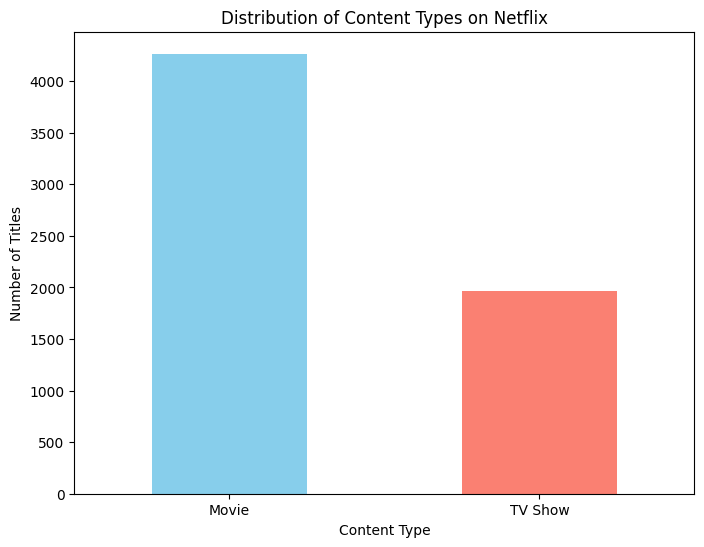

In [80]:
content_distribution = df['type'].value_counts()

plt.figure(figsize=(8, 6))
content_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.show()

## Analyze content by rating

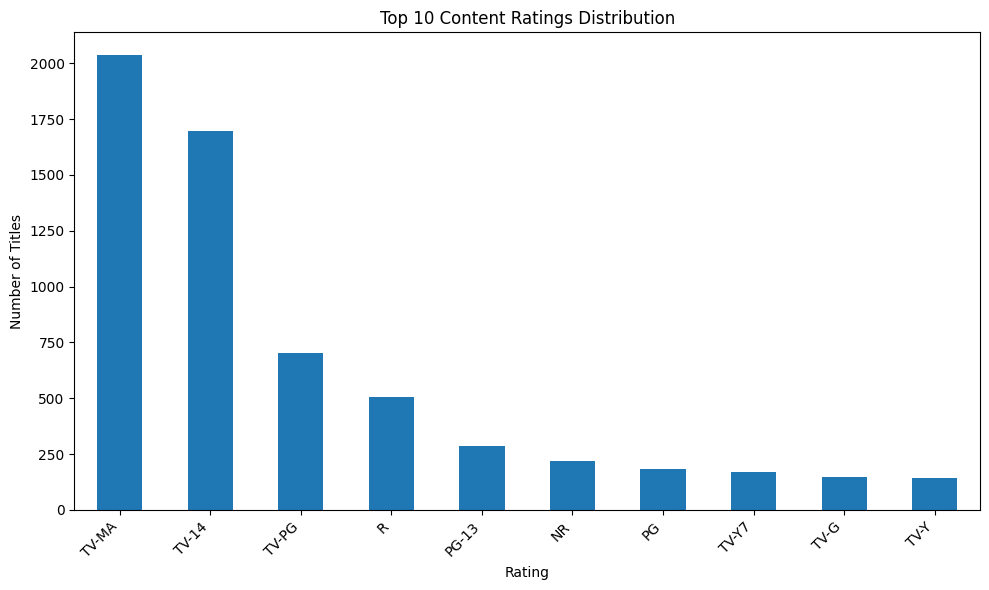

In [81]:
rating_distribution = df['rating'].value_counts()
top_10_ratings = rating_distribution.nlargest(10)

fig, ax = plt.subplots(figsize=(10, 6))
top_10_ratings.plot(kind='bar', ax=ax)
ax.set_title('Top 10 Content Ratings Distribution')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze top cast for movies

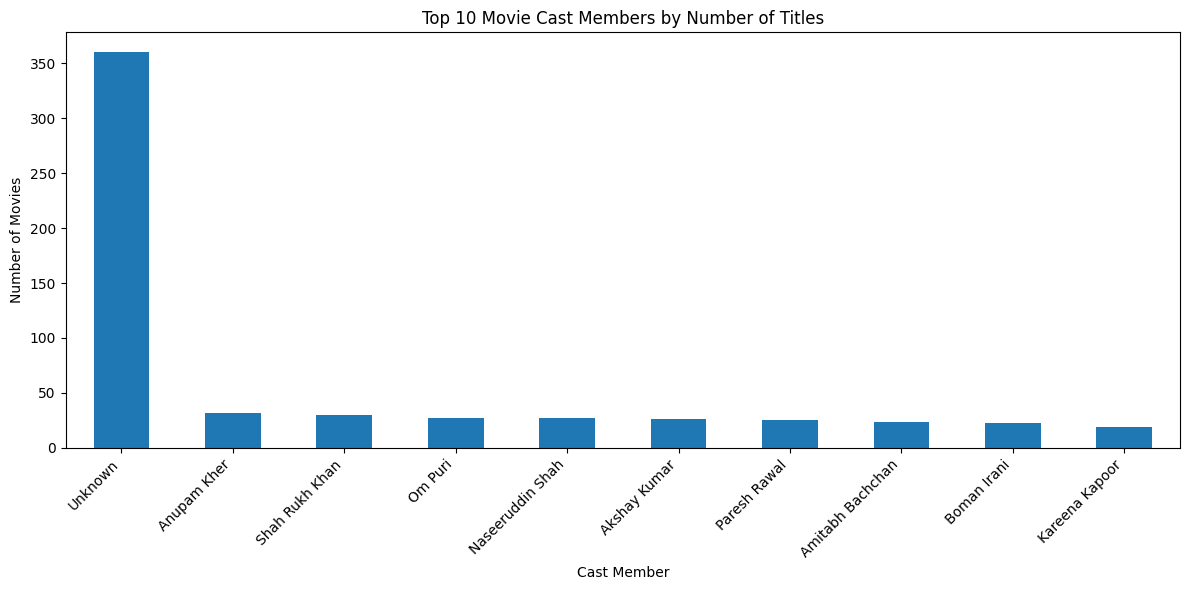

In [82]:
movie_cast = content_cast[content_cast['type'] == 'Movie']

top_movie_cast = movie_cast['cast'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_movie_cast.plot(kind='bar')
plt.title('Top 10 Movie Cast Members by Number of Titles')
plt.xlabel('Cast Member')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze top cast for tv shows

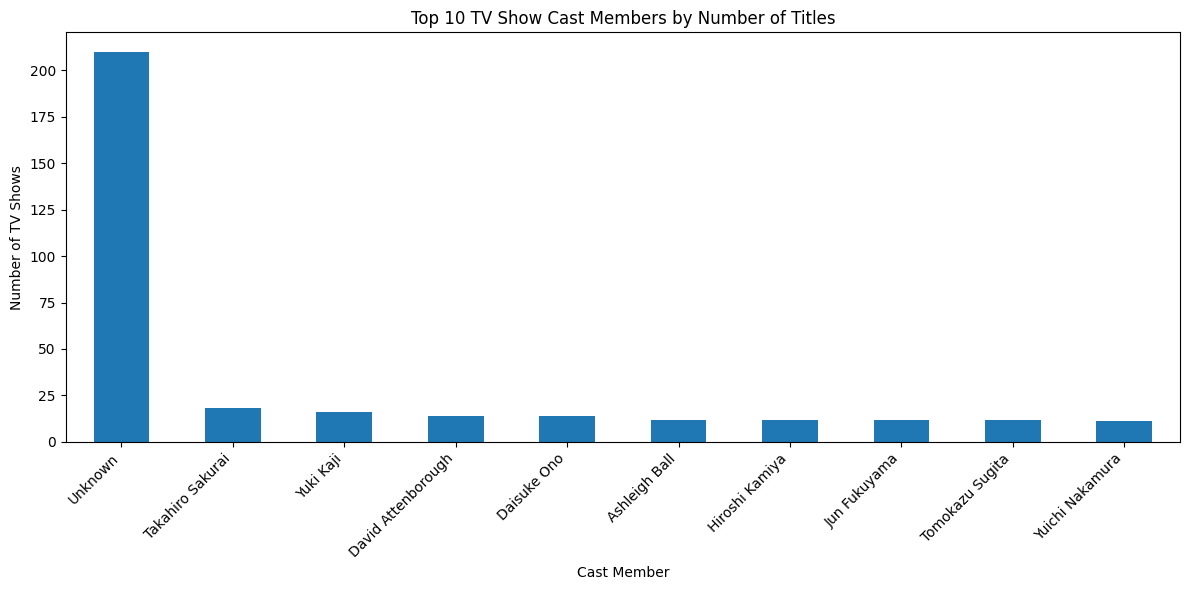

In [83]:
tv_show_cast = content_cast[content_cast['type'] == 'TV Show']

top_tv_show_cast = tv_show_cast['cast'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_tv_show_cast.plot(kind='bar')
plt.title('Top 10 TV Show Cast Members by Number of Titles')
plt.xlabel('Cast Member')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze movie duration distribution

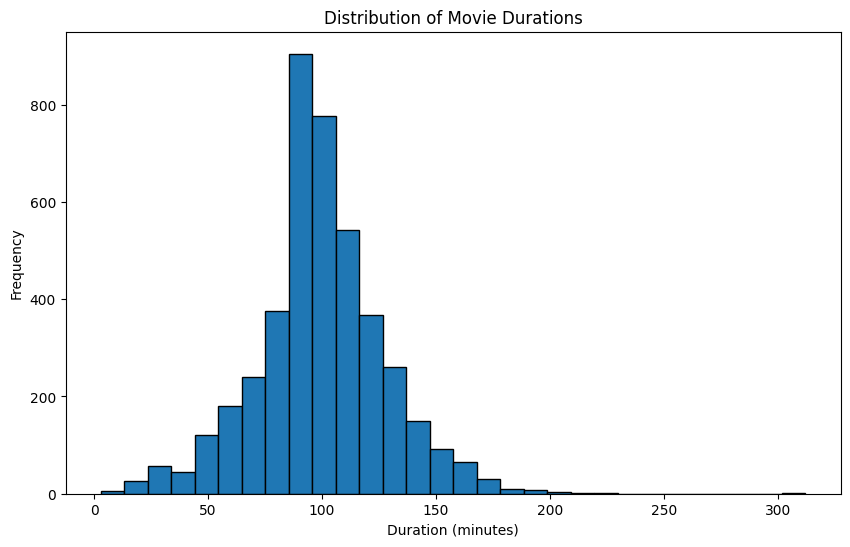

In [84]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(10, 6))
plt.hist(movies_df['duration'], bins=30, edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

## Analyze tv show seasons distribution

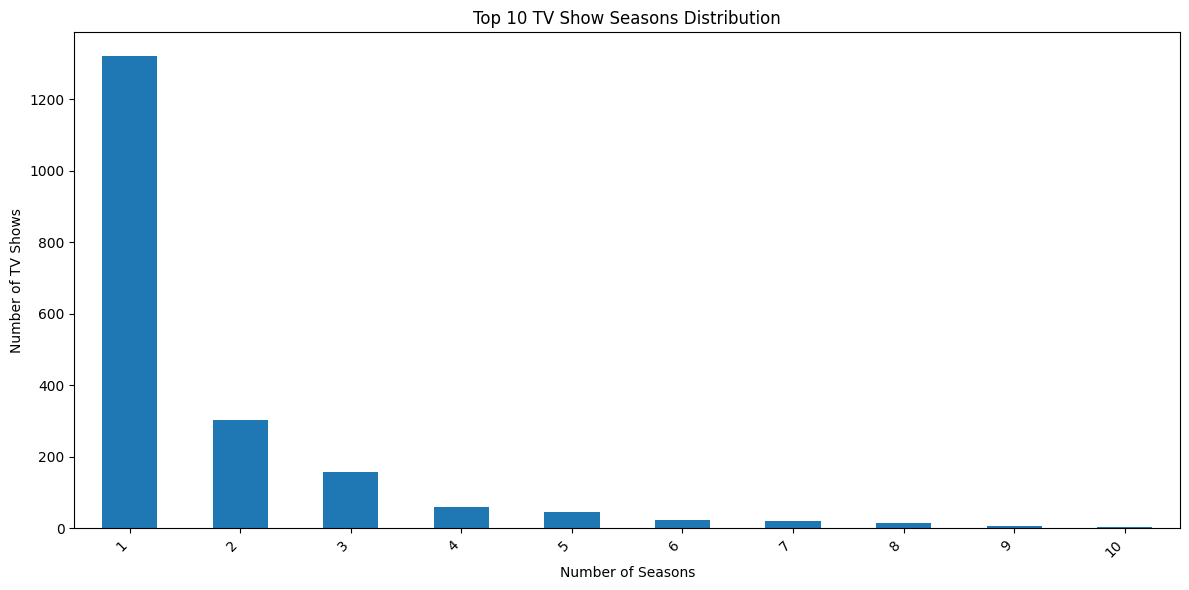

In [85]:
tv_shows_df = df[df['type'] == 'TV Show'].copy()

tv_shows_df['number_of_seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

top_10_seasons = tv_shows_df['number_of_seasons'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_10_seasons.plot(kind='bar')
plt.title('Top 10 TV Show Seasons Distribution')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze the relationship between rating and movie duration

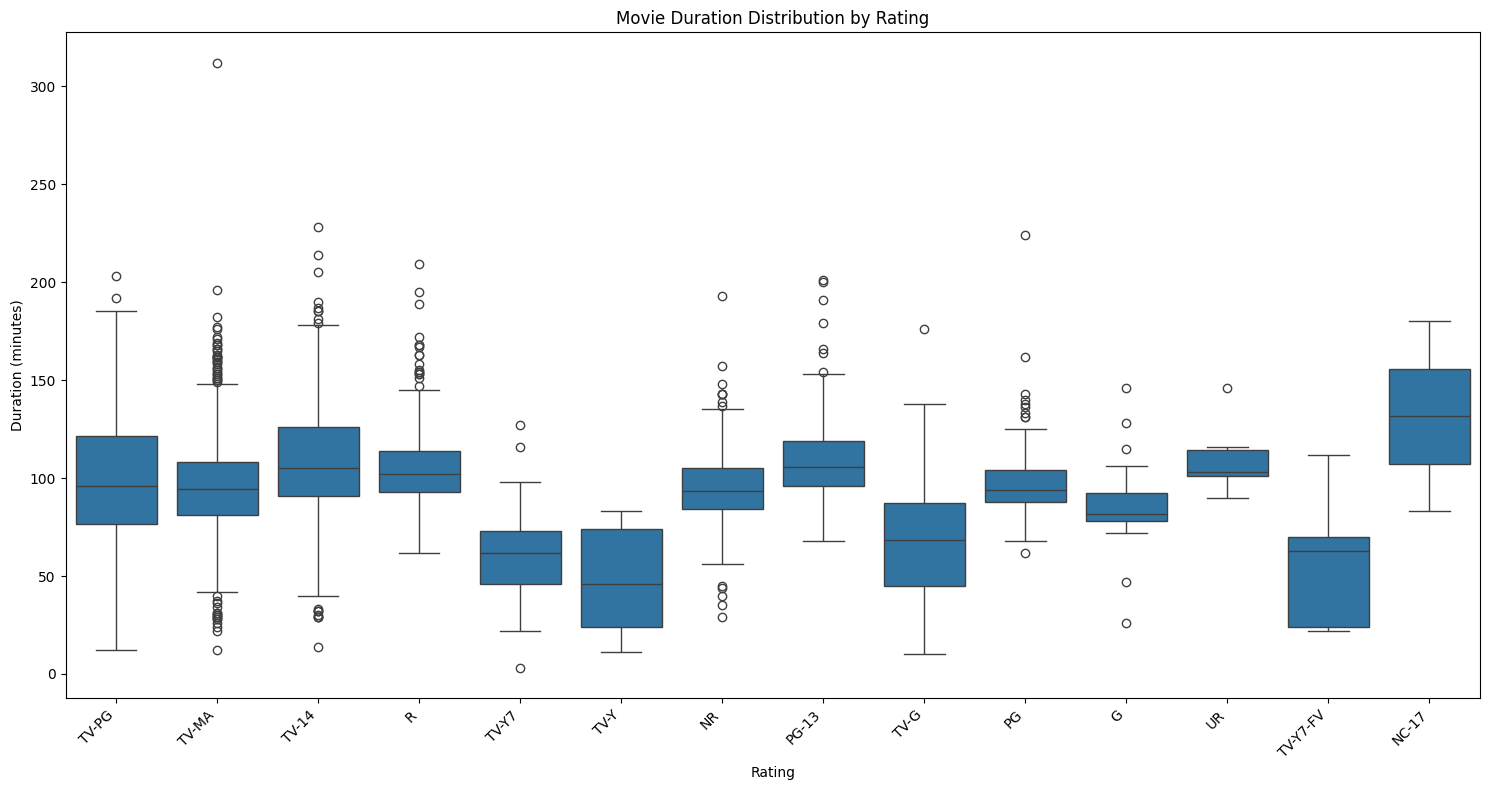

In [86]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=movies_df, x='rating', y='duration')
plt.title('Movie Duration Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze the relationship between rating and tv show seasons

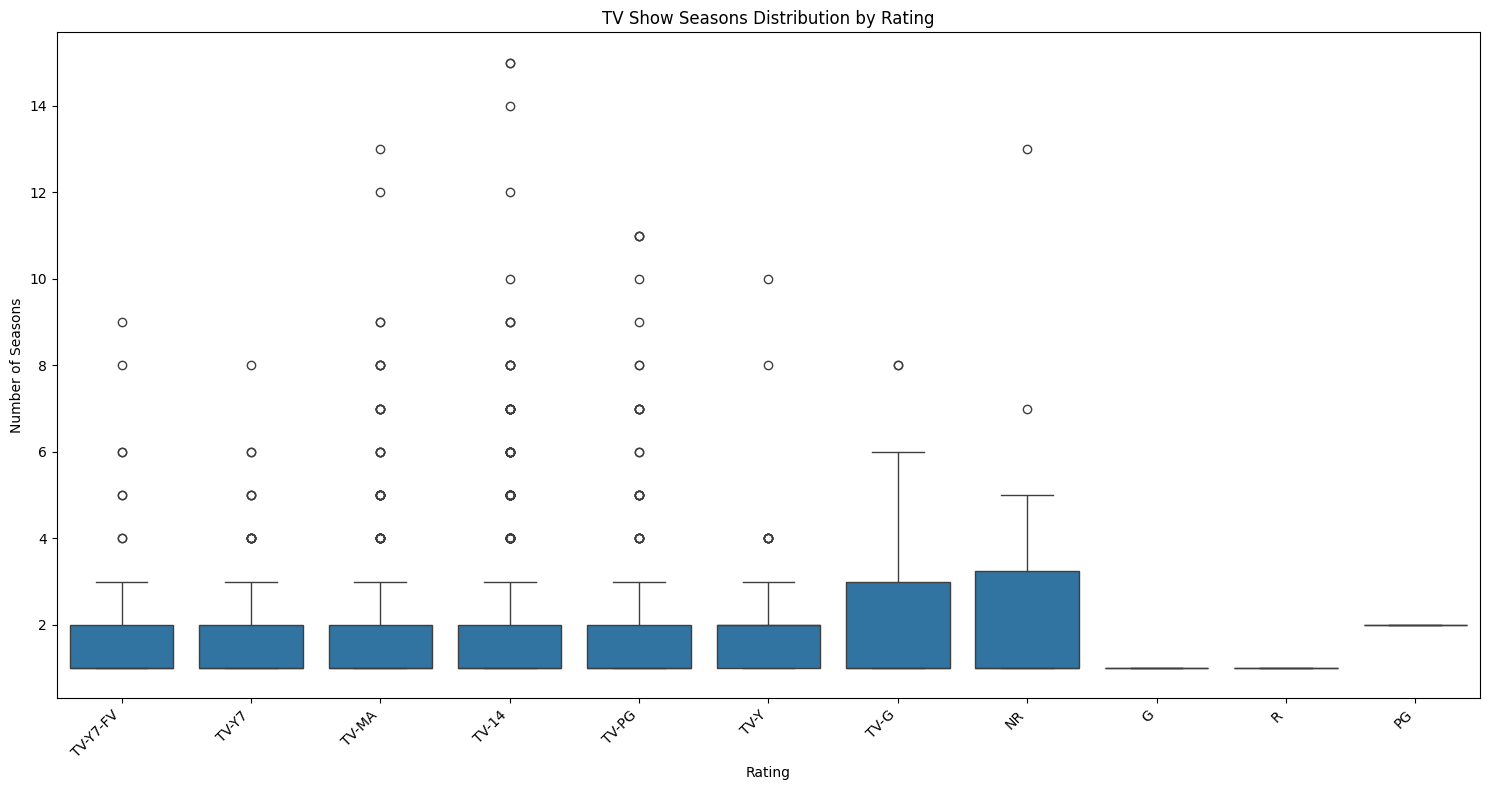

In [87]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=tv_shows_df, x='rating', y='number_of_seasons')
plt.title('TV Show Seasons Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Seasons')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze top cast for movies

In [88]:
cast_counts_per_year = content_cast.groupby(['year_added', 'cast']).size().reset_index(name='count')

top_cast_per_year = cast_counts_per_year.groupby('year_added').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
display(top_cast_per_year.head())

,year_added,cast,count
0,2008,Barbara King,1
1,2008,Chad Thomas,1
2,2008,David Crane,1
3,2008,John Krisiukenas,1
4,2008,Shaana Diya,1


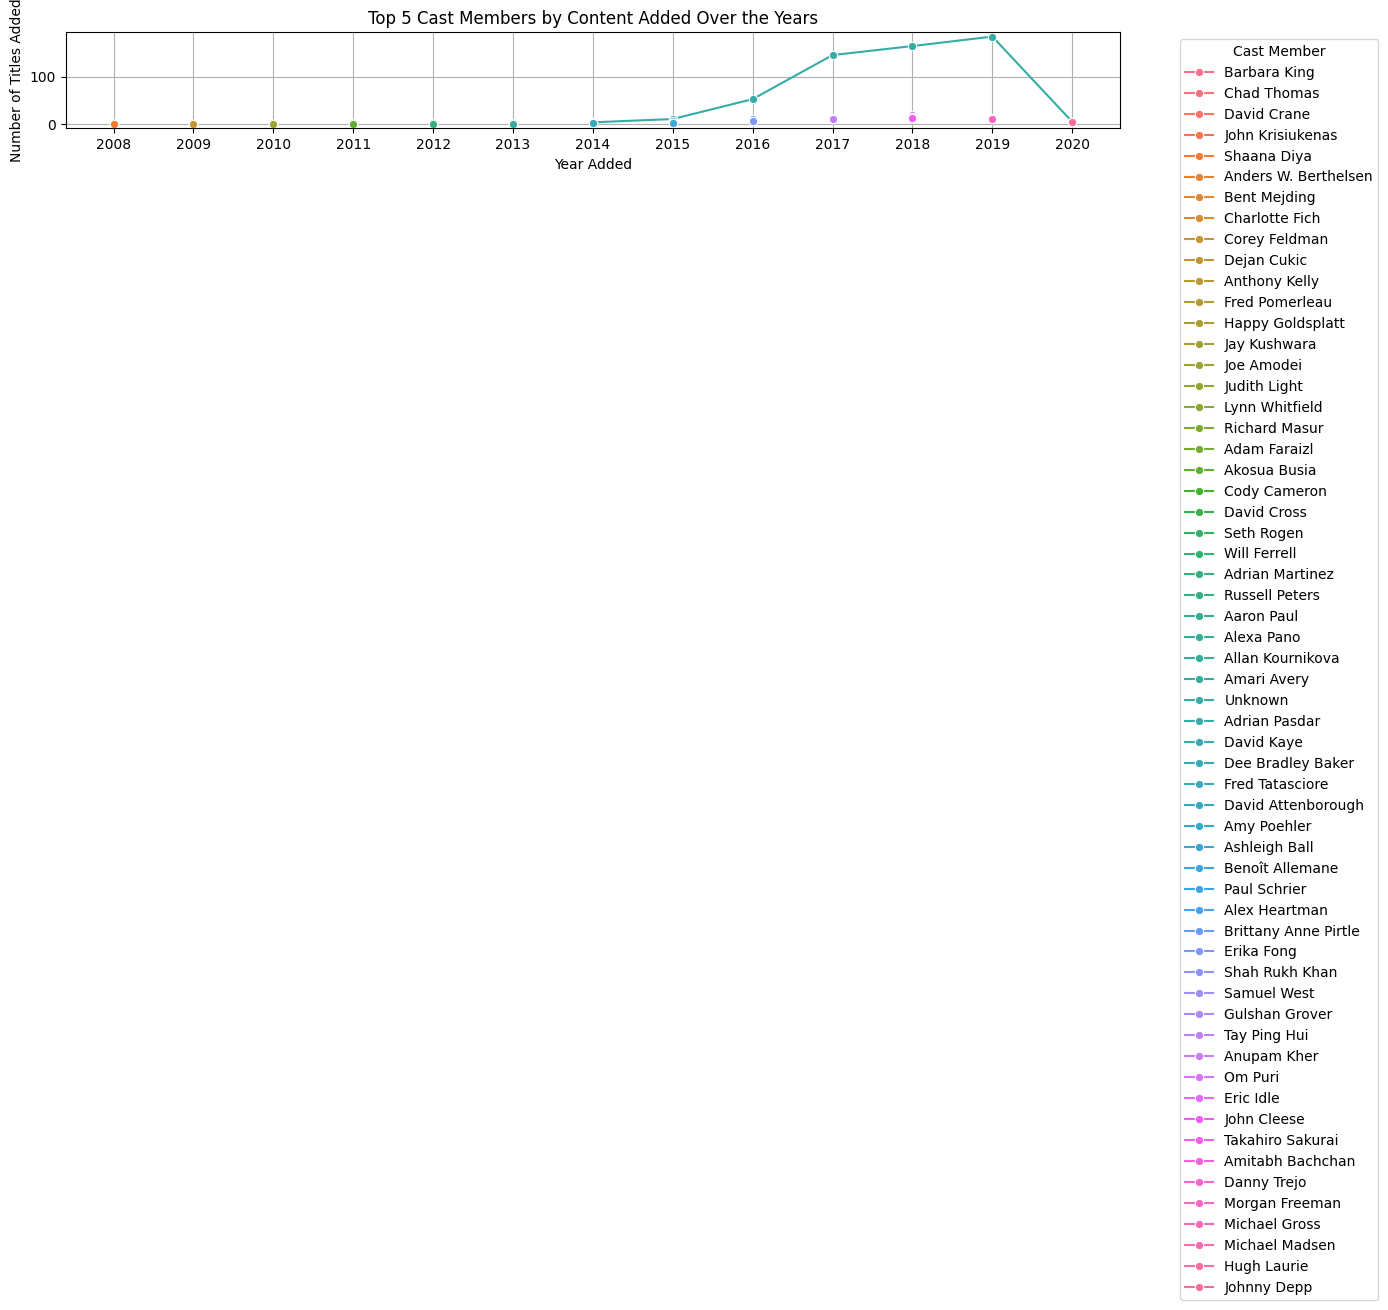

In [89]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_cast_per_year, x='year_added', y='count', hue='cast', marker='o')
plt.title('Top 5 Cast Members by Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(top_cast_per_year['year_added'].unique())
plt.grid(True)
plt.legend(title='Cast Member', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analyze top genres for movies

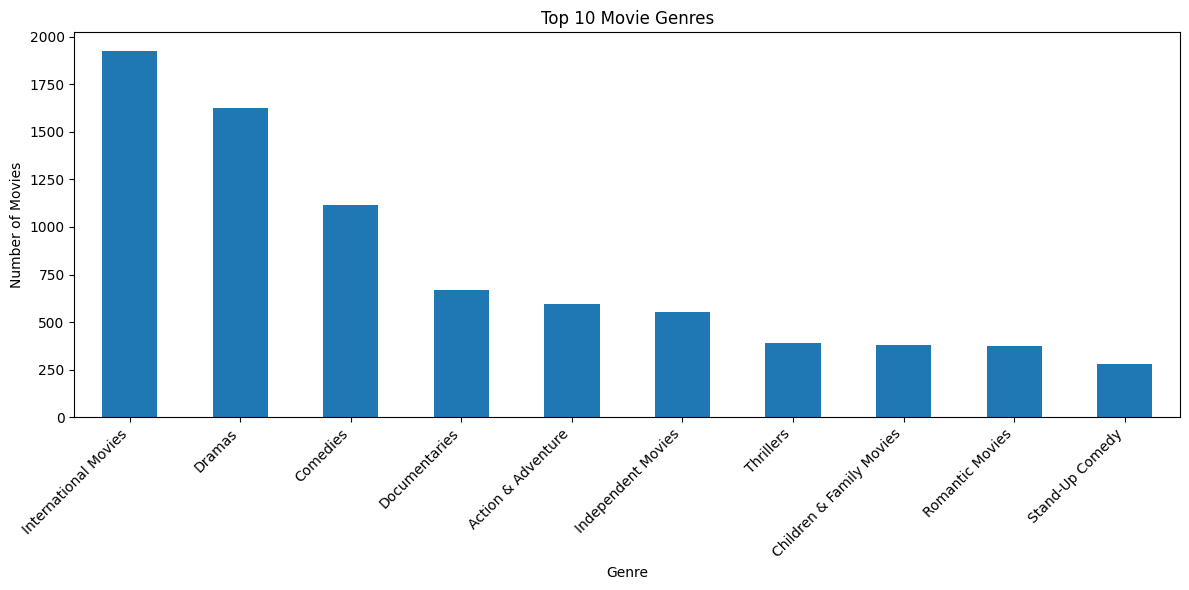

In [90]:
movie_genres = content_genres[content_genres['type'] == 'Movie']

top_movie_genres = movie_genres['listed_in'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_movie_genres.plot(kind='bar')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze top genres for tv shows

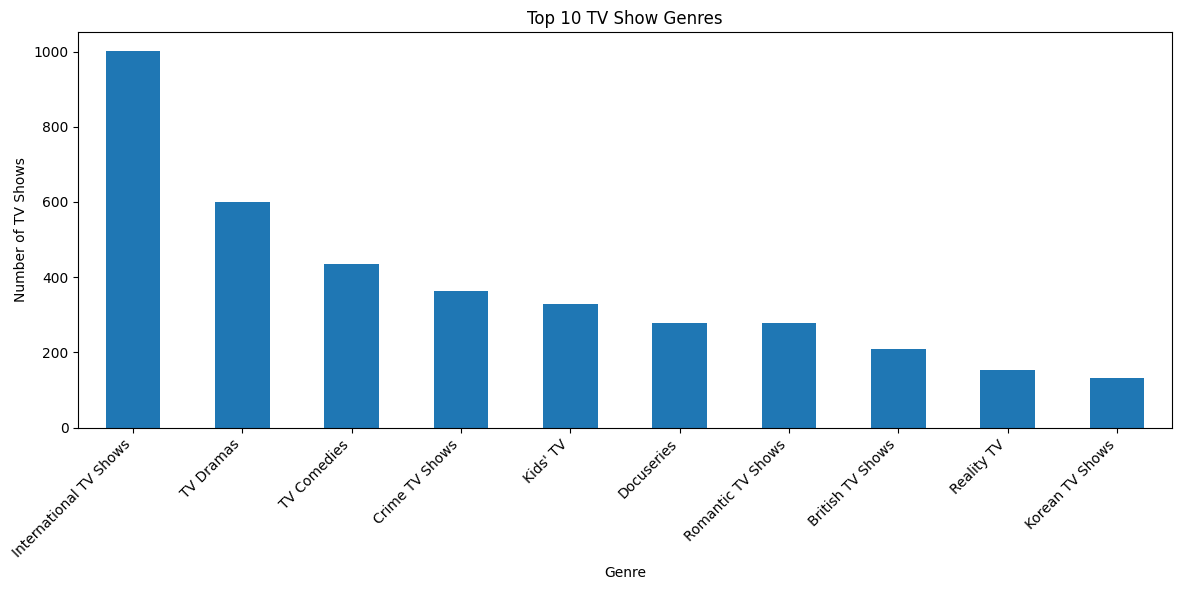

In [91]:
tv_show_genres = content_genres[content_genres['type'] == 'TV Show']

top_tv_show_genres = tv_show_genres['listed_in'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_tv_show_genres.plot(kind='bar')
plt.title('Top 10 TV Show Genres')
plt.xlabel('Genre')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze top directors for movies

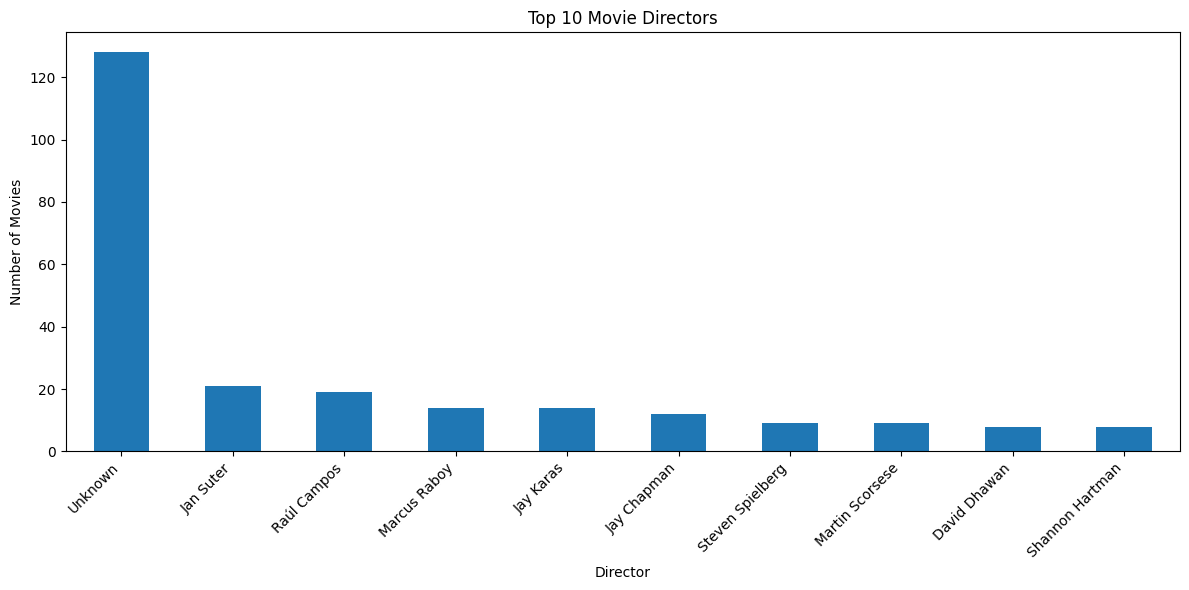

In [92]:
movie_directors = content_directors[content_directors['type'] == 'Movie']

top_movie_directors = movie_directors['director'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_movie_directors.plot(kind='bar')
plt.title('Top 10 Movie Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze top directors for tv shows

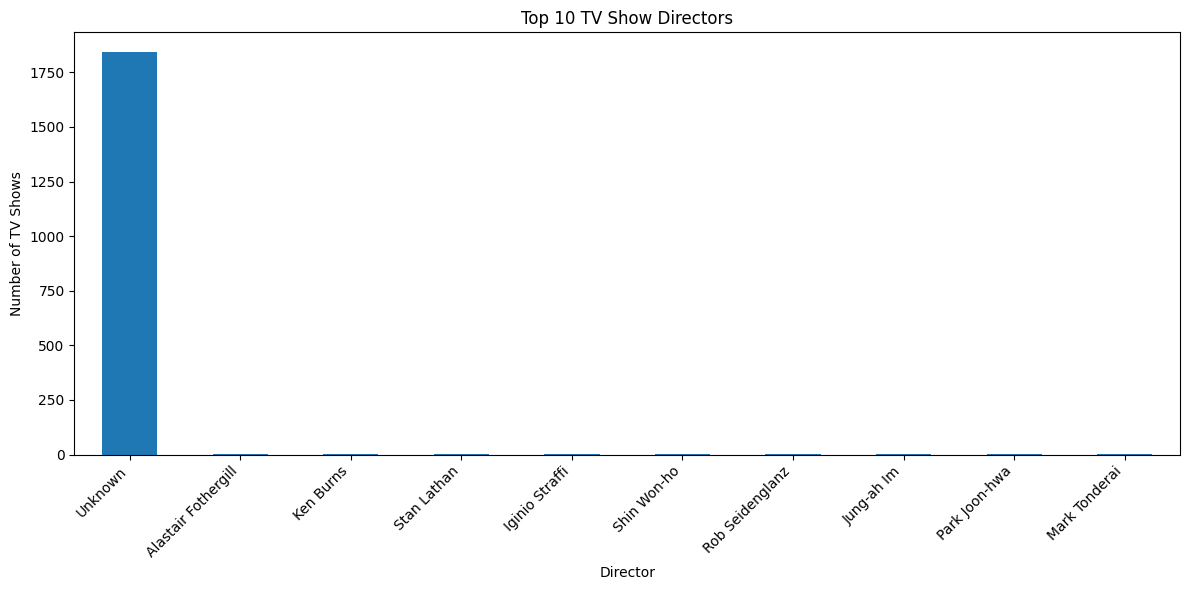

In [93]:
tv_show_directors = content_directors[content_directors['type'] == 'TV Show']
top_tv_show_directors = tv_show_directors['director'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_tv_show_directors.plot(kind='bar')
plt.title('Top 10 TV Show Directors')
plt.xlabel('Director')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze top cast for movies retry

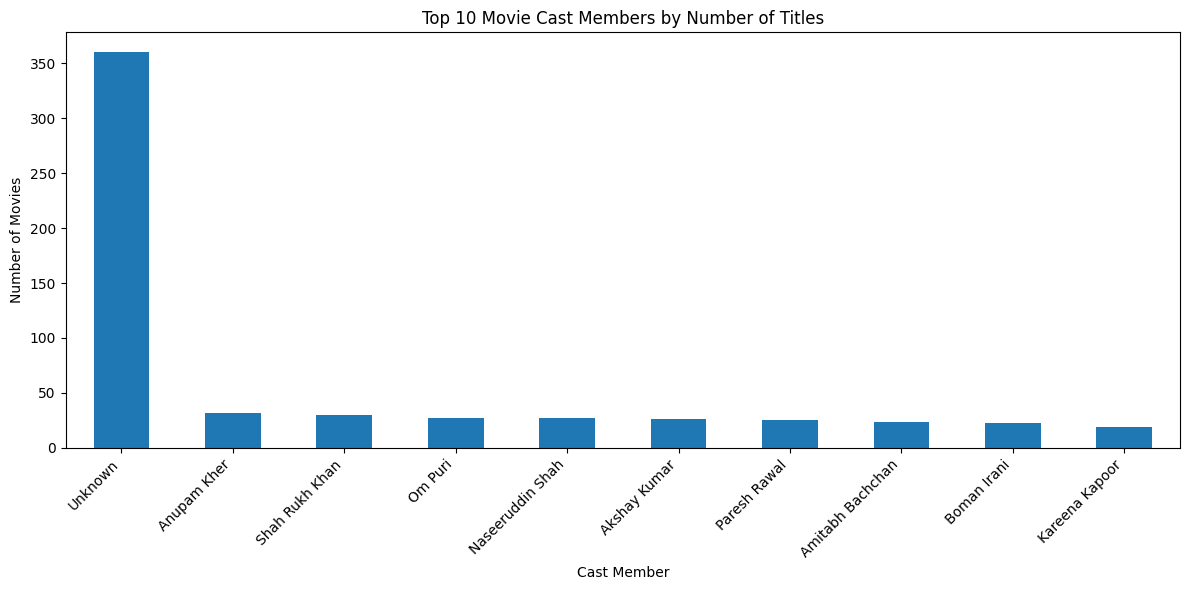

In [94]:
movie_cast = content_cast[content_cast['type'] == 'Movie']

top_movie_cast = movie_cast['cast'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_movie_cast.plot(kind='bar')
plt.title('Top 10 Movie Cast Members by Number of Titles')
plt.xlabel('Cast Member')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze content added over time by country

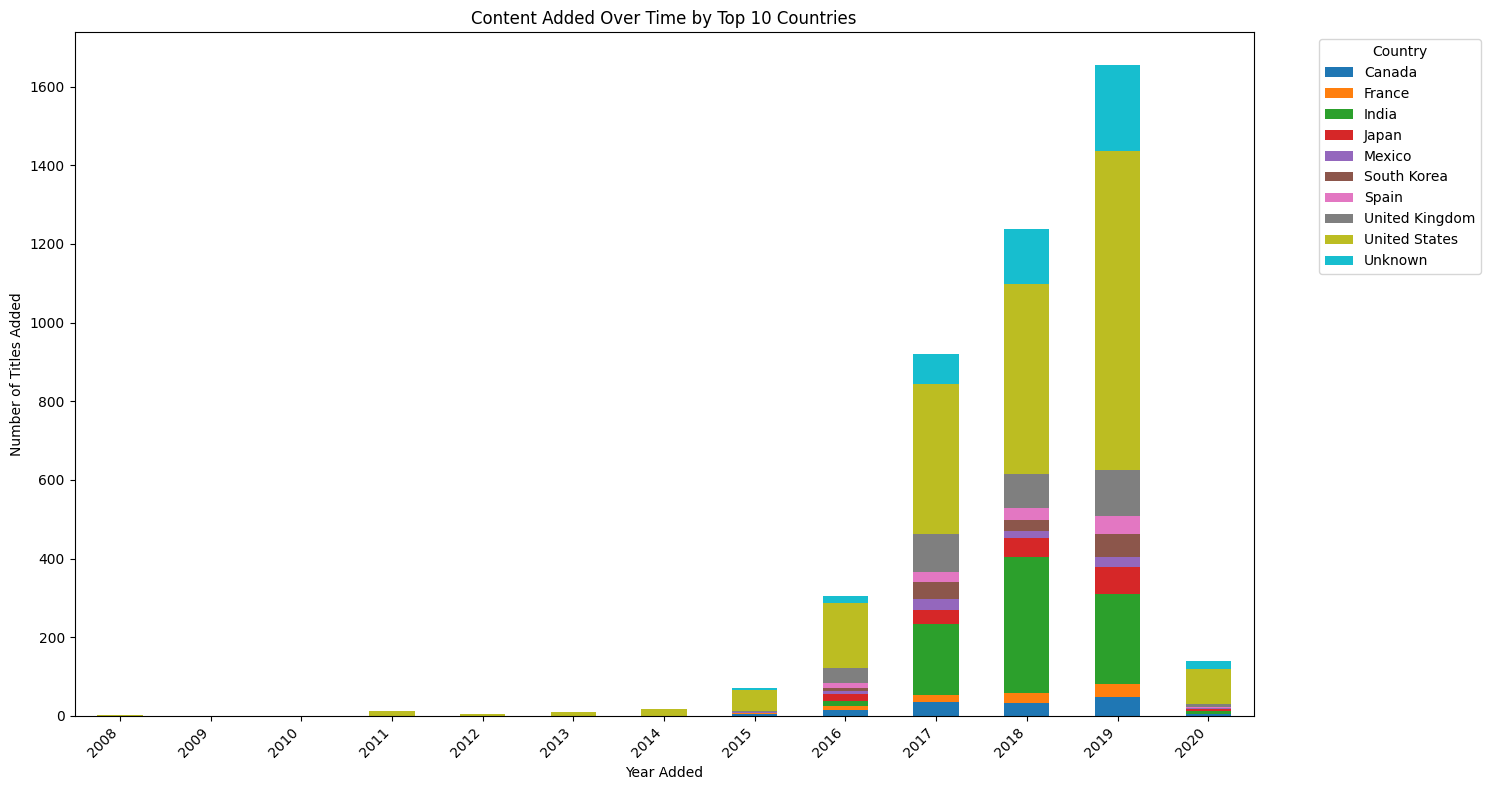

In [95]:
country_year_counts = filtered_df.groupby(['year_added', 'country']).size().unstack().fillna(0)

plt.figure(figsize=(15, 8))
country_year_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Content Added Over Time by Top 10 Countries')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analyze top cast for tv shows

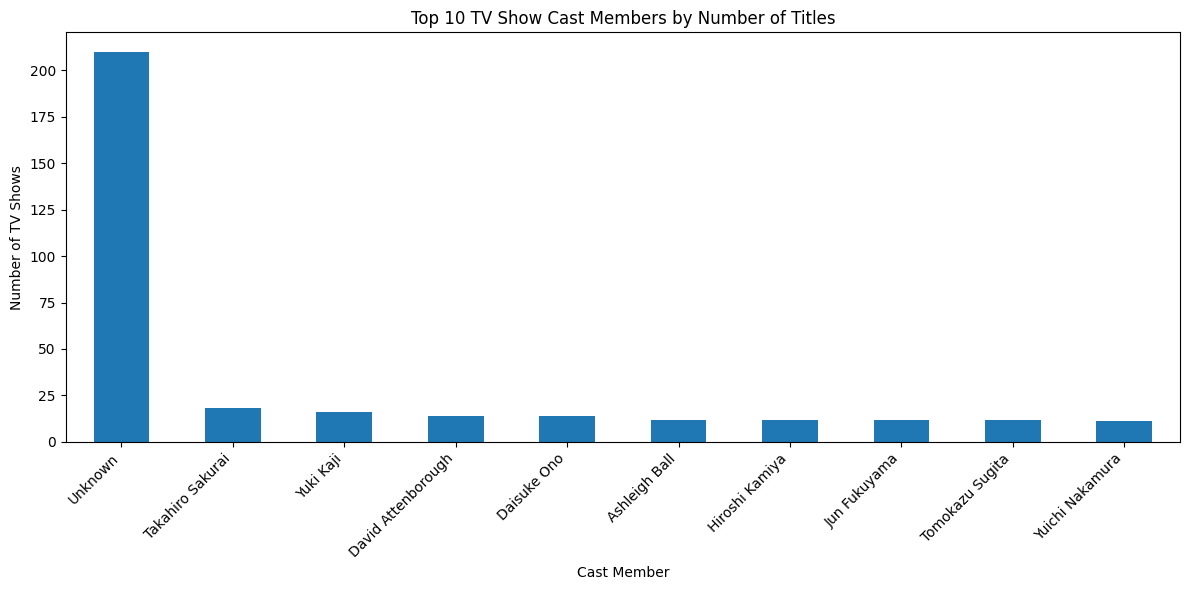

In [96]:
tv_show_cast = content_cast[content_cast['type'] == 'TV Show']
top_tv_show_cast = tv_show_cast['cast'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_tv_show_cast.plot(kind='bar')
plt.title('Top 10 TV Show Cast Members by Number of Titles')
plt.xlabel('Cast Member')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze the most frequent words in movie descriptions

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

movies_descriptions = df[df['type'] == 'Movie']['description']

combined_descriptions = ' '.join(movies_descriptions)

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform([combined_descriptions])

## Analyze the most frequent words in TV show descriptions

In [98]:
tv_show_descriptions = df[df['type'] == 'TV Show']['description']

combined_tv_show_descriptions = ' '.join(tv_show_descriptions)

vectorizer_tv = TfidfVectorizer(stop_words='english')
tfidf_matrix_tv = vectorizer_tv.fit_transform([combined_tv_show_descriptions])

In [99]:
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1

word_tfidf_scores = dict(zip(feature_names, tfidf_scores))

top_words = sorted(word_tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:20]
top_words_df = pd.DataFrame(top_words, columns=['word', 'tfidf_score'])
display(top_words_df)

,word,tfidf_score
0,life,0.269070
1,young,0.254271
2,man,0.219292
3,new,0.210547
4,family,0.184313
5,woman,0.166823
6,documentary,0.146643
7,world,0.145970
8,love,0.145298
9,friends,0.117045


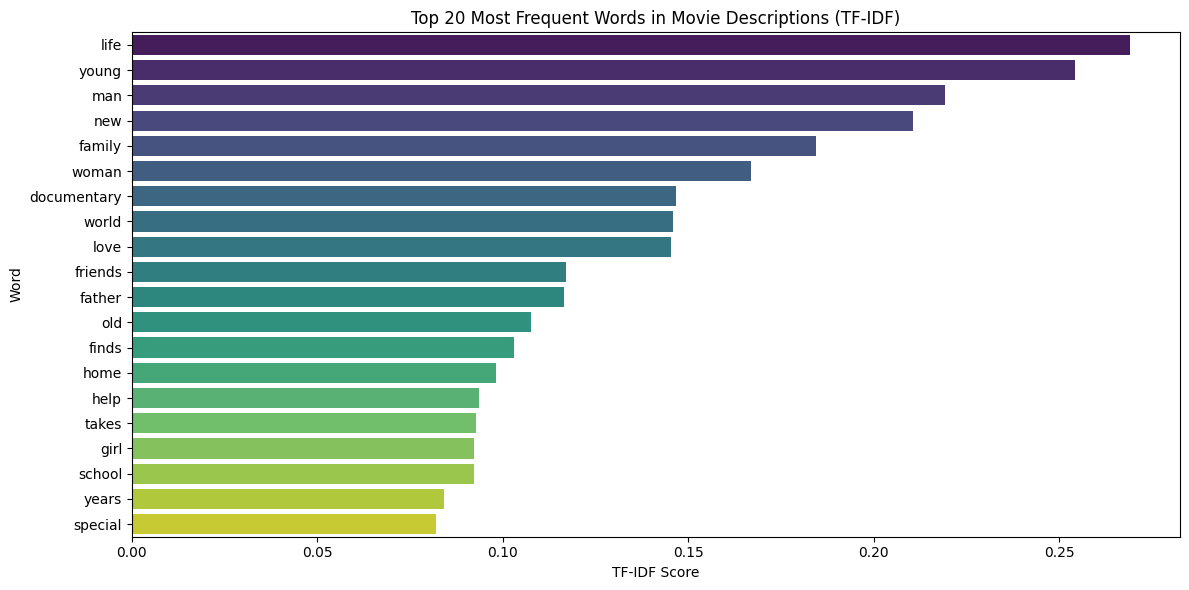

In [100]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tfidf_score', y='word', data=top_words_df, palette='viridis')
plt.title('Top 20 Most Frequent Words in Movie Descriptions (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.tight_layout()
plt.show()